## 3D Probabilistic  Modeling of Hydrofacies using Stacked Machine Learning 
### Nafyad Kawo

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset and Preprocessing

In [2]:
dataset = pd.read_csv('200Cat13_AEMfinal.csv')
SCI_smoothAEM = pd.read_csv('SCI_Smooth.csv',sep=';')
print(dataset.head())
print(dataset['Litho_code'].unique())

   Easting     Northing  Elevation     Roh  Litho_code
0   727400  195934.5238   381.9397   9.696           1
1   727600  195934.5238   381.9397   9.842           1
2   727400  196135.7143   381.9397   9.488           1
3   727600  196135.7143   381.9397  10.043           1
4   729400  199757.1429   381.9397  12.480           0
[1 0]


In [3]:
dataset.shape

(15380, 5)

In [4]:
dataset1= dataset.rename(columns={"Roh": "AEM_resistivity", "Litho_code": "litho_groupcode"})

In [5]:
dataset1

Easting     Northing   Elevation  AEM_resistivity  litho_groupcode
0       727400  195934.5238  381.939700         9.696000                1
1       727600  195934.5238  381.939700         9.842000                1
2       727400  196135.7143  381.939700         9.488000                1
3       727600  196135.7143  381.939700        10.043000                1
4       729400  199757.1429  381.939700        12.480000                0
...        ...          ...         ...              ...              ...
15375   701200  202171.4286  526.586525        12.392838                0
15376   699800  203579.7619  526.586525        12.493603                0
15377   699800  203780.9524  526.586525        12.006178                0
15378   699800  203579.7619  529.600000        12.688493                0
15379   699800  203780.9524  529.600000        12.332623                0

[15380 rows x 5 columns]

In [6]:
dataset1.columns

Index(['Easting', 'Northing', 'Elevation', 'AEM_resistivity',
       'litho_groupcode'],
      dtype='object')

In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15380 entries, 0 to 15379
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Easting          15380 non-null  int64  
 1   Northing         15380 non-null  float64
 2   Elevation        15380 non-null  float64
 3   AEM_resistivity  15380 non-null  float64
 4   litho_groupcode  15380 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 600.9 KB


In [8]:
dataset1.describe().T

count           mean           std            min  \
Easting          15380.0  719932.912874  10006.707483  698600.000000   
Northing         15380.0  199313.765095   4291.340930  191105.952400   
Elevation        15380.0     455.186161     37.858398     177.023404   
AEM_resistivity  15380.0      18.598385      7.326967       5.417000   
litho_groupcode  15380.0       0.340897      0.474026       0.000000   

                          25%          50%           75%          max  
Easting          712200.00000  721000.0000  729000.00000  735600.0000  
Northing         195733.33330  200360.7143  202976.19050  206195.2381  
Elevation           439.19570     457.2766     478.37090     529.6000  
AEM_resistivity      13.62675      16.8130      21.54925      60.5160  
litho_groupcode       0.00000       0.0000       1.00000       1.0000

In [9]:
dataset1['AEM_resistivity'].describe().T

count    15380.000000
mean        18.598385
std          7.326967
min          5.417000
25%         13.626750
50%         16.813000
75%         21.549250
max         60.516000
Name: AEM_resistivity, dtype: float64

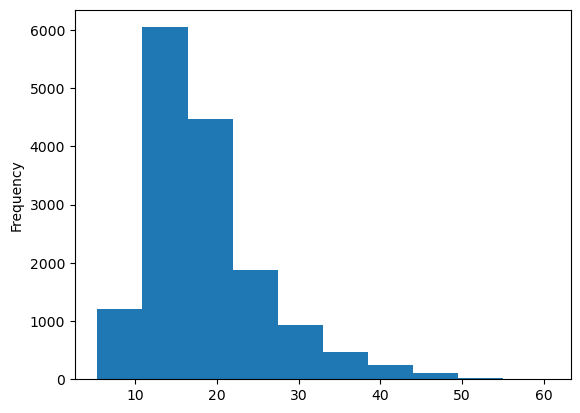

In [10]:
# Check the distribution of the AEM Resistivity column with a histogram
dataset1.AEM_resistivity.plot.hist();
 

In [11]:
dataset1["litho_groupcode"].value_counts()


0    10137
1     5243
Name: litho_groupcode, dtype: int64

In [12]:
dataset1.litho_groupcode.value_counts(normalize=True)


0    0.659103
1    0.340897
Name: litho_groupcode, dtype: float64

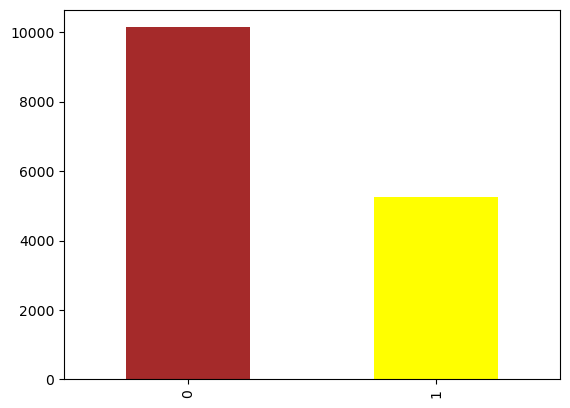

In [13]:
dataset1.litho_groupcode.value_counts().plot(kind="bar", color=["brown", "yellow"]);

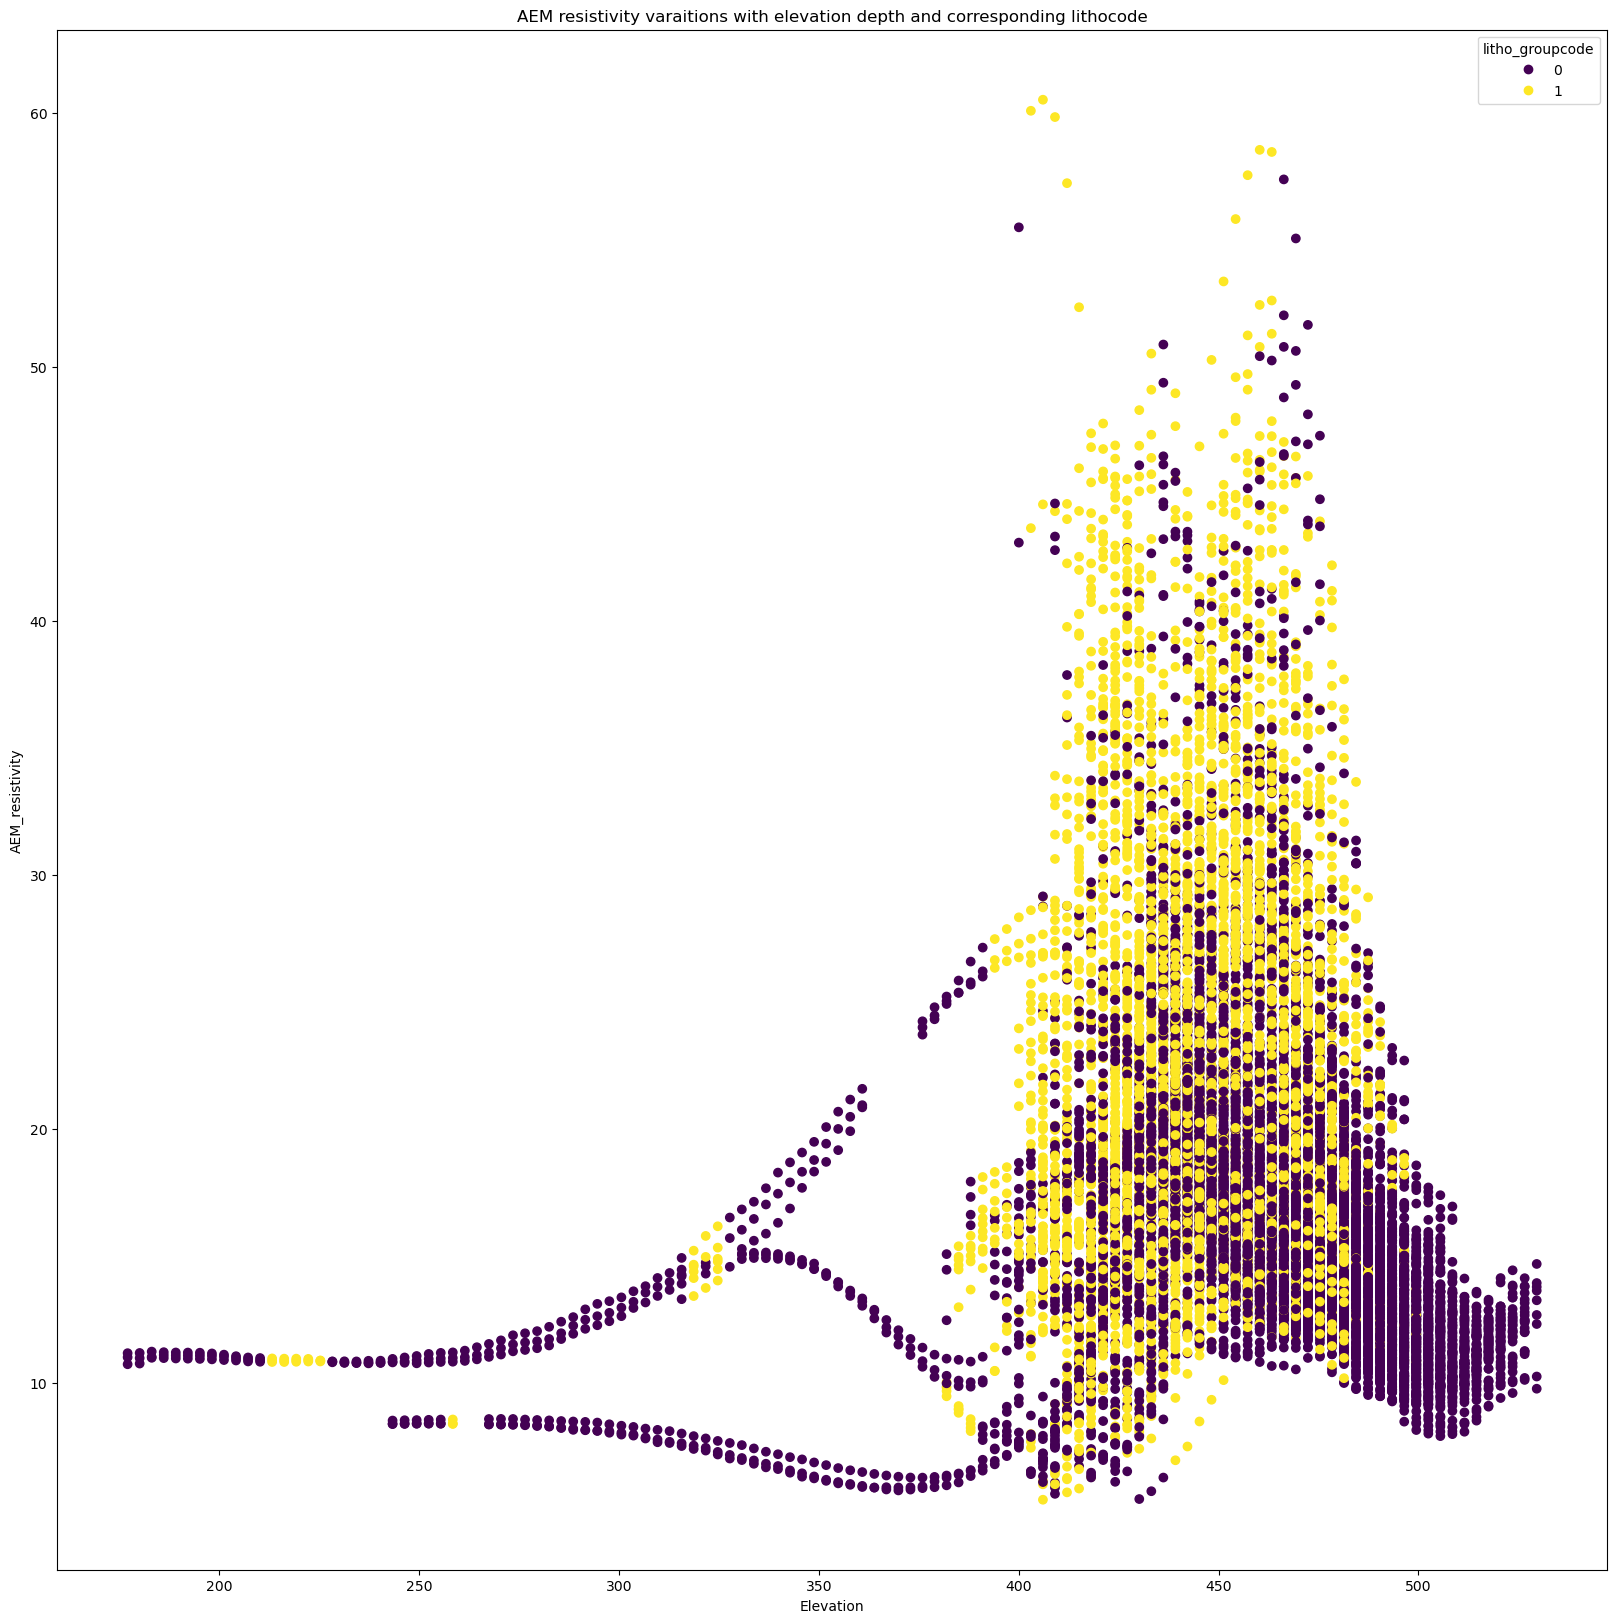

In [14]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the data
scatter = ax.scatter(dataset1["Elevation"], 
                     dataset1["AEM_resistivity"], 
                     c=dataset1["litho_groupcode"])

# Customize the plot
ax.set(title="AEM resistivity varaitions with elevation depth and corresponding lithocode",
       xlabel="Elevation",
       ylabel="AEM_resistivity");
ax.legend(*scatter.legend_elements(), title="litho_groupcode");

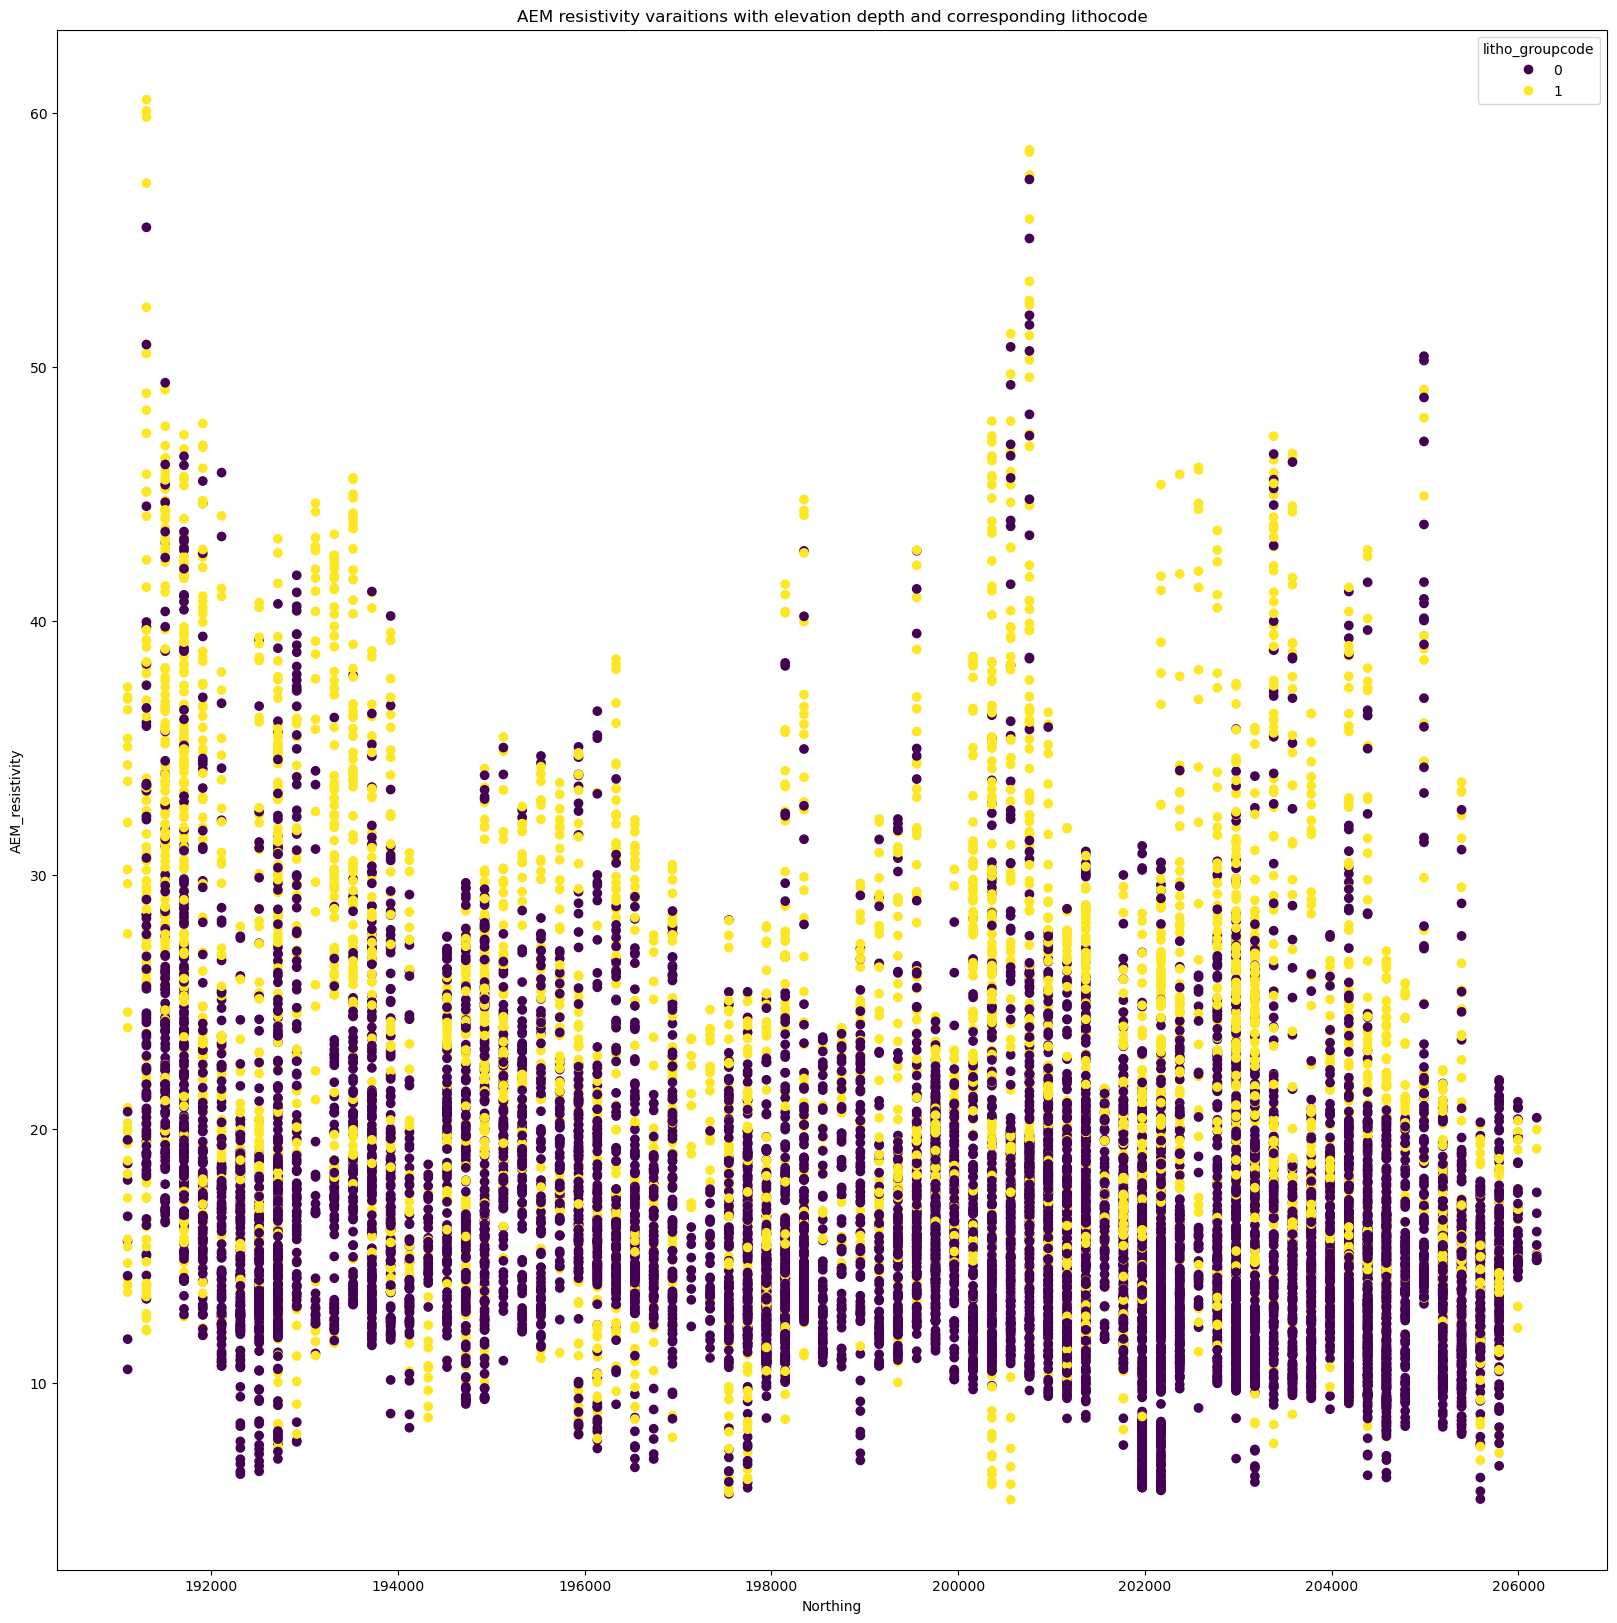

In [15]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the data
scatter = ax.scatter(dataset1["Northing"], 
                     dataset1["AEM_resistivity"], 
                     c=dataset1["litho_groupcode"])

# Customize the plot
ax.set(title="AEM resistivity varaitions with elevation depth and corresponding lithocode",
       xlabel="Northing",
       ylabel="AEM_resistivity");
ax.legend(*scatter.legend_elements(), title="litho_groupcode");

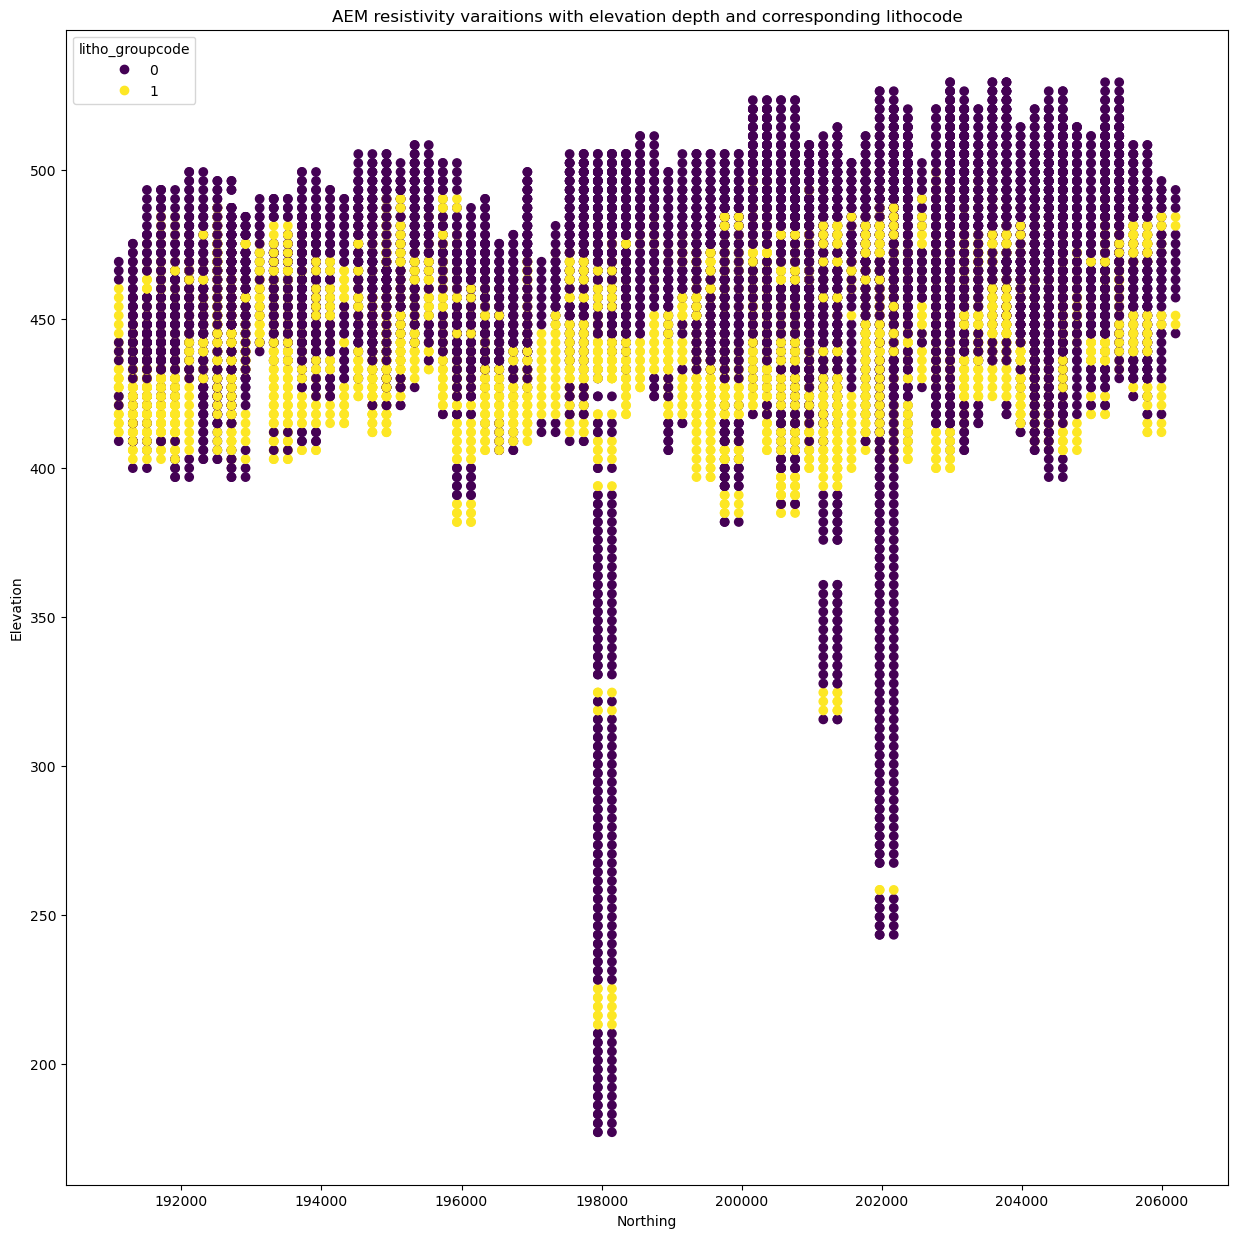

In [16]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the data
scatter = ax.scatter(dataset1["Northing"], 
                     dataset1["Elevation"], 
                     c=dataset1["litho_groupcode"])

# Customize the plot
ax.set(title="AEM resistivity varaitions with elevation depth and corresponding lithocode",
       xlabel="Northing",
       ylabel="Elevation");
ax.legend(*scatter.legend_elements(), title="litho_groupcode");

In [17]:
import seaborn as sns


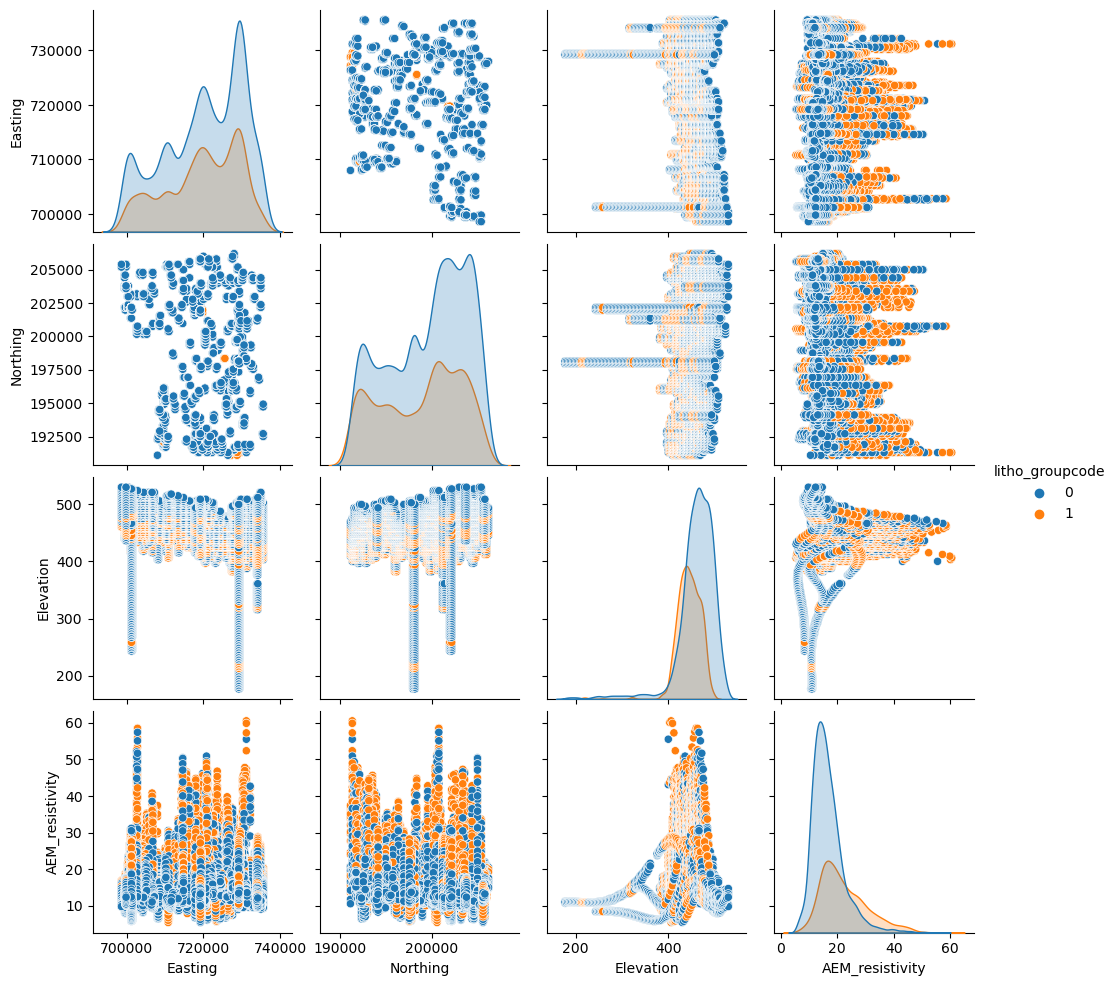

In [18]:

ax = sns.pairplot(dataset1[['Easting', 'Northing', 'Elevation', 'AEM_resistivity',
       'litho_groupcode']], plot_kws={'color':'blue'},hue = 'litho_groupcode')

The median is:  16.813000000000002


C:\Users\nafya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


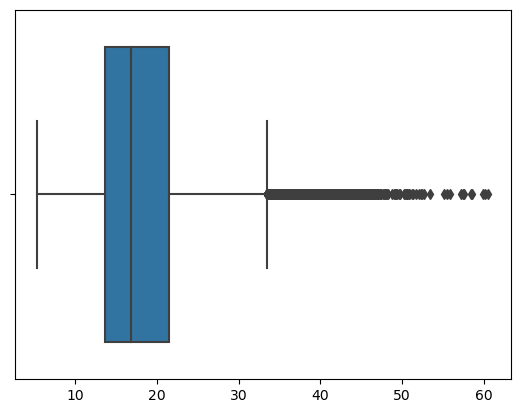

In [19]:
xbox = dataset1['AEM_resistivity'].values

ax = sns.boxplot(xbox)
print('The median is: ', dataset1['AEM_resistivity'].median())

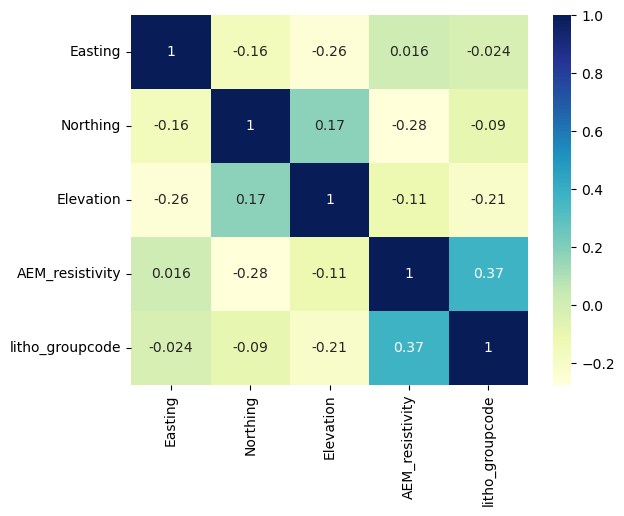

In [20]:
ax = sns.heatmap( dataset1.corr(), cmap="YlGnBu",annot=True)

Text(0.5, 1.0, 'Correlation Matrix')

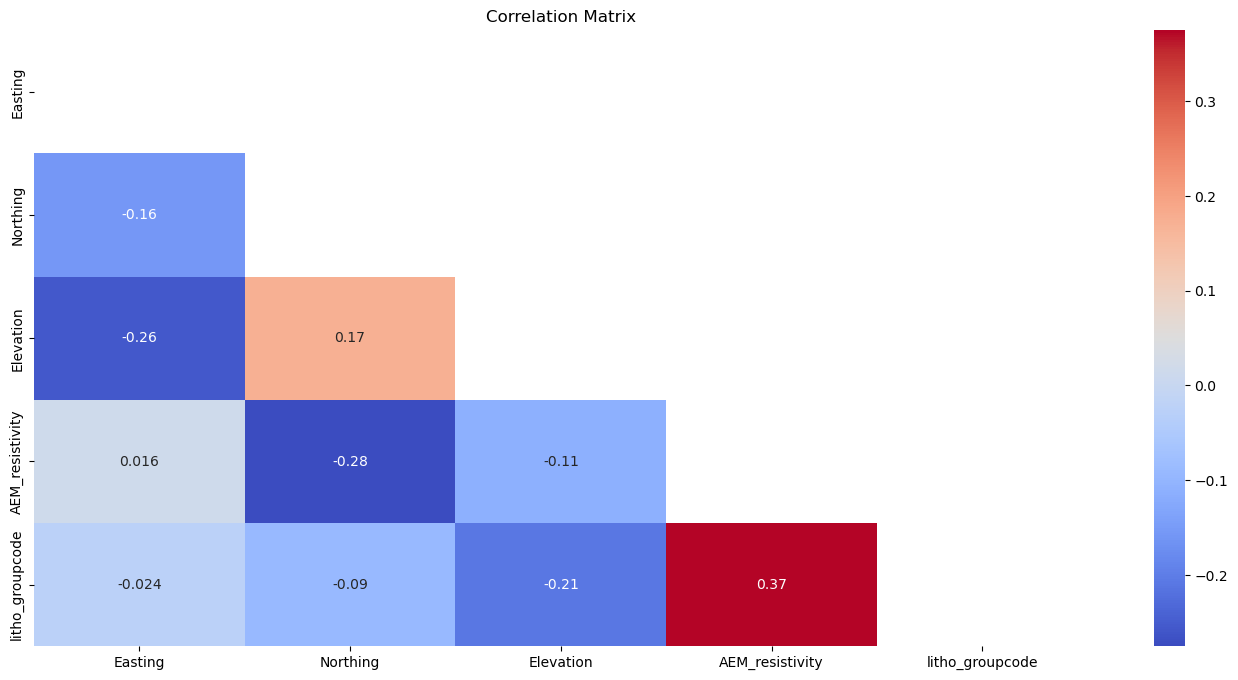

In [21]:
#plot half corr () matrix
plt.subplots(figsize=(17,8))
matrix = np.triu(dataset1.corr())
ax = sns.heatmap(dataset1.corr(), mask = matrix, cmap = 'coolwarm',annot=True)
plt.title('Correlation Matrix', fontsize = 12)


In [22]:
dataset1.corr()

Easting  Northing  Elevation  AEM_resistivity  \
Easting          1.000000 -0.157063  -0.256754         0.015845   
Northing        -0.157063  1.000000   0.173182        -0.275218   
Elevation       -0.256754  0.173182   1.000000        -0.111264   
AEM_resistivity  0.015845 -0.275218  -0.111264         1.000000   
litho_groupcode -0.024253 -0.089859  -0.209979         0.374939   

                 litho_groupcode  
Easting                -0.024253  
Northing               -0.089859  
Elevation              -0.209979  
AEM_resistivity         0.374939  
litho_groupcode         1.000000

### Spliting data into features and target

In [23]:
X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set 


In [24]:
#The stratify parameter  preserves the proportion of  data (how data are distributed in the target column) - and depicts that same proportion of distribution in the train_test_split (https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,shuffle=True, random_state = 42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(12304, 4)
(3076, 4)
(12304,)
(3076,)


### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [26]:
print(X_train)

[[ 0.26666505 -1.52997131 -0.73977656  1.76361533]
 [-0.43095079  0.75962904 -0.73977656 -1.30281566]
 [-2.04543315  1.03998827  0.37326425 -0.35718302]
 ...
 [-1.56706801  0.19891059 -0.02425051  1.6183533 ]
 [-0.17183634 -0.2683548   0.53226858  0.27995501]
 [ 0.60550702  0.85308212 -0.02425051  0.43202407]]


In [27]:
print(y_train)

[0 0 0 ... 1 0 0]


In [28]:
print(X_test)

[[ 0.2068694   0.38581674  1.00928682 -0.38822308]
 [-0.96911158 -1.763604   -0.10375399 -0.24963194]
 [-0.11204069 -0.82907325  1.0887903  -0.28339481]
 ...
 [ 0.10721    -0.31508132 -0.50126612 -1.11657531]
 [-0.29142762 -1.0159794  -0.5807696  -0.70134647]
 [ 0.74503019  1.50725364 -0.73977656 -0.05794597]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier



In [30]:
## RandomizedSearchCV to tune HP
from sklearn.model_selection import RandomizedSearchCV

In [31]:
## Hyperparameters to tune MLP(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
param_gridMLP = {
    'hidden_layer_sizes': [(10,25),(20,10),(20,100,10),(30,20),(60,40,10),(64,100,20),(20,10,10),(50,30,20),(160,100,40),(200,100,60,40,20),(160,80,30,40,10), (160,100,60,40,20),(100,80,50,20)],
    'max_iter': [50, 100, 1150,2000,3000,6000],
    'activation': ['tanh', 'identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.001, 0.05, 0.1],
    'learning_rate_init': [0.0001,0.0005,0.001, 0.005,0.01],
    'learning_rate': ['constant','adaptive']
}



In [32]:
mlp1=MLPClassifier()

In [33]:
# tune MLPclassifier
gridMLP = RandomizedSearchCV(mlp1, param_distributions=param_gridMLP, n_jobs= -1,verbose = 1, cv=10, scoring = 'average_precision')
gridMLP.fit(X_train,y_train)
YpredMLP =gridMLP.predict(X_test)
YpredMLP_pro=gridMLP.predict_proba(X_test)
#Printing the best hyperparameters
print('The MLG best hyper parameters are:\n',gridMLP.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The MLG best hyper parameters are:
 {'solver': 'adam', 'max_iter': 3000, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (60, 40, 10), 'alpha': 0.05, 'activation': 'tanh'}


In [34]:
mlp2=MLPClassifier()

In [35]:
### building MLP model with best parameters
MLPCa = MLPClassifier(solver ='adam', max_iter=3000, learning_rate_init=0.01, learning_rate='adaptive', hidden_layer_sizes=(50, 30, 20), alpha=0.05, activation='relu')

In [36]:
#grid search
XGB = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500,600,700,800,900,1000,1500,2000,3000]
max_depth = [2,3,4,6,7,8,10,15,20,35]
learning_rate = [0.0001, 0.001, 0.01, 0.1,0.3,0.5]
min_child_weight=[6,8,10,12]
gamma=[i/10.0 for i in range(0,5)]
subsample= [0.5, 0.6, 0.7, 0.8, 0.9]
colsample_bytree= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colsample_bylevel= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth,min_child_weight=min_child_weight,subsample=subsample,colsample_bytree=colsample_bytree,colsample_bylevel=colsample_bylevel,gamma=gamma)
grid_XGB = RandomizedSearchCV(XGB, param_distributions= param_grid,n_jobs=-1, cv=10,scoring= 'average_precision')
XGB_grid = grid_XGB.fit(X_train, y_train)
#Printing the best hyperparameters
print('The XGBoost best hyper parameters are:\n',XGB_grid.best_params_)

The XGBoost best hyper parameters are:
 {'subsample': 0.6, 'n_estimators': 3000, 'min_child_weight': 12, 'max_depth': 20, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.4}


In [37]:
### Building XGBoost with best Prameters
XGB = XGBClassifier(subsample= 0.6, n_estimators=300, min_child_weight=10, max_depth=35, learning_rate= 0.01, gamma=0.4, colsample_bytree=0.9, colsample_bylevel= 0.4)

In [38]:
YpredXGB =grid_XGB.predict(X_test)
YpredXGB_pro=grid_XGB.predict_proba(X_test)

In [39]:
XGB_hy =XGBClassifier(subsample= 0.5, n_estimators= 1000, min_child_weight= 6, max_depth= 35, learning_rate= 0.1, gamma= 0.1, colsample_bytree= 0.8, colsample_bylevel= 0.6)

In [40]:
XGB_grid1 = XGB_hy.fit(X_train, y_train)

In [41]:
## #Setting values for the Gradientboosting Classifier parameters (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
parametersGBC = {
    "n_estimators":np.arange(10, 1000, 20),
    "max_depth":np.arange(6, 100, 10),
    "learning_rate":[0.0001,0.001,0.01,0.1,1],
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(2, 10, 2)
                                      }

In [42]:
### tune GBC
Grid_GBC = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=parametersGBC,cv=10, scoring= 'average_precision', n_jobs=-1)
Grid_GBC.fit(X_train, y_train)
YpredGBC =Grid_GBC.predict(X_test)
YpredGBC_pro=Grid_GBC.predict_proba(X_test)
#Printing the best hyperparameters
print('The GBC best hyper parameters are:\n',Grid_GBC.best_params_)


The GBC best hyper parameters are:
 {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 16, 'learning_rate': 0.1}


In [43]:
### Building GBC with best parameters
GBC=GradientBoostingClassifier(n_estimators=650, min_samples_split=4, min_samples_leaf= 8, max_depth=26, learning_rate=0.1)

In [44]:
#Setting values for the  RF parameters 
ParameterRF ={  "n_estimators ": np.arange(100, 1000, 10),
                 "max_depth":np.arange(5, 100, 10),
                 "min_samples_split": np.arange (2, 20, 2),
                 "min_samples_leaf":np.arange(2, 10, 1),
                 "criterion":['gini','entropy'],
                 "max_features" :['auto', 'sqrt']
}


In [45]:
RandomForestClassifier1=RandomForestClassifier()

In [46]:
#Setting values for the parameters
n_estimators = np.arange(100, 1000, 10)
max_depth =np.arange(5, 100, 20)
min_samples_split = np.arange (2, 20, 2)
min_samples_leaf = np.arange(2, 20, 2)
criterion =['gini','entropy']
max_features = ['auto', 'sqrt']
#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf,criterion = criterion,max_features = max_features)

#Applying RandomSearchCV to get the best value for hyperparameters
grid_RF= RandomizedSearchCV(RandomForestClassifier1, param_distributions= hyper_rf, cv = 10, verbose = 1,scoring= 'average_precision', n_jobs = -1)
bestrf = grid_RF.fit(X_train, y_train)
YpredRF =grid_RF.predict(X_test)
YpredRF_pro=grid_RF.predict_proba(X_test)
#Printing the best hyperparameters
print('The RF best hyper parameters are:\n',grid_RF.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
The RF best hyper parameters are:
 {'n_estimators': 190, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25, 'criterion': 'entropy'}


In [47]:
RF = RandomForestClassifier(n_estimators=240, min_samples_split=8, min_samples_leaf=2, max_features= 'sqrt', max_depth=65, criterion='gini',random_state=42)

In [48]:
RF

RandomForestClassifier(max_depth=65, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=8, n_estimators=240, random_state=42)

In [49]:
##Install CatBoost
#!pip install catboost


In [50]:
from catboost import CatBoostClassifier

In [51]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
              'iterations':[250,100,500,1000],
              'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
              'l2_leaf_reg':[3,1,5,10,100],
              'border_count':[32,5,10,20,50,100,200],
              'bagging_temperature':[0.03,0.09,0.25,0.75],
              'random_strength':[0.2,0.5,0.8],
              'max_ctr_complexity':[1,2,3,4,5] }


    

In [52]:
CatB= CatBoostClassifier()
#grid_search_result = model.grid_search(params, X=X_train,y= y_train,cv=5,partition_random_seed=3,stratified=True)

In [53]:
#Applying RandomSearchCV to get the best value for hyperparameters
Gridcat= RandomizedSearchCV(CatB, param_distributions= params, cv = 10, verbose = 1,scoring= 'average_precision', n_jobs = -1)
bestcat = Gridcat.fit(X_train, y_train)
Ypredcat =Gridcat.predict(X_test)
Ypredcat_pro=Gridcat.predict_proba(X_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0:	learn: 0.6107087	total: 155ms	remaining: 2m 34s
1:	learn: 0.5694050	total: 162ms	remaining: 1m 20s
2:	learn: 0.5395667	total: 171ms	remaining: 56.7s
3:	learn: 0.5177303	total: 178ms	remaining: 44.2s
4:	learn: 0.5038101	total: 186ms	remaining: 37s
5:	learn: 0.4939193	total: 195ms	remaining: 32.2s
6:	learn: 0.4865985	total: 204ms	remaining: 29s
7:	learn: 0.4814166	total: 213ms	remaining: 26.4s
8:	learn: 0.4776838	total: 221ms	remaining: 24.3s
9:	learn: 0.4734730	total: 229ms	remaining: 22.7s
10:	learn: 0.4685438	total: 241ms	remaining: 21.7s
11:	learn: 0.4654308	total: 250ms	remaining: 20.6s
12:	learn: 0.4619689	total: 261ms	remaining: 19.8s
13:	learn: 0.4589565	total: 268ms	remaining: 18.9s
14:	learn: 0.4557791	total: 276ms	remaining: 18.2s
15:	learn: 0.4535374	total: 285ms	remaining: 17.6s
16:	learn: 0.4510281	total: 294ms	remaining: 17s
17:	learn: 0.4491899	total: 302ms	remaining: 16.5s
18:	learn: 0.4478234	total: 311ms

166:	learn: 0.3099476	total: 1.41s	remaining: 7.04s
167:	learn: 0.3092795	total: 1.42s	remaining: 7.03s
168:	learn: 0.3089980	total: 1.43s	remaining: 7.01s
169:	learn: 0.3083311	total: 1.43s	remaining: 7s
170:	learn: 0.3074476	total: 1.44s	remaining: 6.98s
171:	learn: 0.3070800	total: 1.45s	remaining: 6.97s
172:	learn: 0.3064077	total: 1.45s	remaining: 6.95s
173:	learn: 0.3060088	total: 1.46s	remaining: 6.94s
174:	learn: 0.3052682	total: 1.47s	remaining: 6.92s
175:	learn: 0.3047420	total: 1.48s	remaining: 6.91s
176:	learn: 0.3041423	total: 1.48s	remaining: 6.9s
177:	learn: 0.3036183	total: 1.49s	remaining: 6.88s
178:	learn: 0.3034764	total: 1.5s	remaining: 6.87s
179:	learn: 0.3027388	total: 1.5s	remaining: 6.85s
180:	learn: 0.3022839	total: 1.51s	remaining: 6.84s
181:	learn: 0.3017811	total: 1.52s	remaining: 6.82s
182:	learn: 0.3012557	total: 1.52s	remaining: 6.81s
183:	learn: 0.3008115	total: 1.53s	remaining: 6.79s
184:	learn: 0.3004355	total: 1.54s	remaining: 6.78s
185:	learn: 0.3001

341:	learn: 0.2395332	total: 2.65s	remaining: 5.1s
342:	learn: 0.2391529	total: 2.66s	remaining: 5.09s
343:	learn: 0.2388585	total: 2.66s	remaining: 5.08s
344:	learn: 0.2386386	total: 2.67s	remaining: 5.07s
345:	learn: 0.2381420	total: 2.68s	remaining: 5.06s
346:	learn: 0.2379737	total: 2.69s	remaining: 5.05s
347:	learn: 0.2377735	total: 2.69s	remaining: 5.04s
348:	learn: 0.2376114	total: 2.7s	remaining: 5.03s
349:	learn: 0.2371963	total: 2.71s	remaining: 5.02s
350:	learn: 0.2370058	total: 2.71s	remaining: 5.01s
351:	learn: 0.2366254	total: 2.72s	remaining: 5s
352:	learn: 0.2364291	total: 2.73s	remaining: 5s
353:	learn: 0.2361793	total: 2.73s	remaining: 4.99s
354:	learn: 0.2358423	total: 2.74s	remaining: 4.98s
355:	learn: 0.2352385	total: 2.75s	remaining: 4.97s
356:	learn: 0.2347813	total: 2.75s	remaining: 4.96s
357:	learn: 0.2345916	total: 2.76s	remaining: 4.95s
358:	learn: 0.2342091	total: 2.76s	remaining: 4.94s
359:	learn: 0.2338568	total: 2.77s	remaining: 4.93s
360:	learn: 0.233528

531:	learn: 0.1933026	total: 3.89s	remaining: 3.42s
532:	learn: 0.1931976	total: 3.89s	remaining: 3.41s
533:	learn: 0.1930091	total: 3.9s	remaining: 3.4s
534:	learn: 0.1928020	total: 3.91s	remaining: 3.4s
535:	learn: 0.1927319	total: 3.92s	remaining: 3.39s
536:	learn: 0.1926306	total: 3.92s	remaining: 3.38s
537:	learn: 0.1922285	total: 3.93s	remaining: 3.37s
538:	learn: 0.1921247	total: 3.94s	remaining: 3.37s
539:	learn: 0.1918407	total: 3.94s	remaining: 3.36s
540:	learn: 0.1916058	total: 3.95s	remaining: 3.35s
541:	learn: 0.1914462	total: 3.96s	remaining: 3.35s
542:	learn: 0.1913246	total: 3.97s	remaining: 3.34s
543:	learn: 0.1910713	total: 3.97s	remaining: 3.33s
544:	learn: 0.1908813	total: 3.98s	remaining: 3.32s
545:	learn: 0.1904858	total: 3.99s	remaining: 3.32s
546:	learn: 0.1902747	total: 4s	remaining: 3.31s
547:	learn: 0.1899872	total: 4s	remaining: 3.3s
548:	learn: 0.1898372	total: 4.01s	remaining: 3.3s
549:	learn: 0.1896559	total: 4.02s	remaining: 3.29s
550:	learn: 0.1895359	t

702:	learn: 0.1633433	total: 5.15s	remaining: 2.18s
703:	learn: 0.1631435	total: 5.16s	remaining: 2.17s
704:	learn: 0.1629781	total: 5.17s	remaining: 2.16s
705:	learn: 0.1628645	total: 5.17s	remaining: 2.15s
706:	learn: 0.1627768	total: 5.18s	remaining: 2.15s
707:	learn: 0.1627090	total: 5.19s	remaining: 2.14s
708:	learn: 0.1626241	total: 5.2s	remaining: 2.13s
709:	learn: 0.1625663	total: 5.21s	remaining: 2.13s
710:	learn: 0.1623644	total: 5.21s	remaining: 2.12s
711:	learn: 0.1621137	total: 5.22s	remaining: 2.11s
712:	learn: 0.1619887	total: 5.23s	remaining: 2.1s
713:	learn: 0.1619069	total: 5.24s	remaining: 2.1s
714:	learn: 0.1618682	total: 5.24s	remaining: 2.09s
715:	learn: 0.1617125	total: 5.25s	remaining: 2.08s
716:	learn: 0.1616055	total: 5.26s	remaining: 2.08s
717:	learn: 0.1614922	total: 5.27s	remaining: 2.07s
718:	learn: 0.1613447	total: 5.27s	remaining: 2.06s
719:	learn: 0.1611826	total: 5.28s	remaining: 2.05s
720:	learn: 0.1610806	total: 5.29s	remaining: 2.05s
721:	learn: 0.1

865:	learn: 0.1428422	total: 6.38s	remaining: 987ms
866:	learn: 0.1427056	total: 6.38s	remaining: 980ms
867:	learn: 0.1424659	total: 6.39s	remaining: 972ms
868:	learn: 0.1423303	total: 6.4s	remaining: 965ms
869:	learn: 0.1422863	total: 6.41s	remaining: 958ms
870:	learn: 0.1421870	total: 6.42s	remaining: 950ms
871:	learn: 0.1421175	total: 6.42s	remaining: 943ms
872:	learn: 0.1419908	total: 6.43s	remaining: 936ms
873:	learn: 0.1418222	total: 6.44s	remaining: 929ms
874:	learn: 0.1417296	total: 6.45s	remaining: 921ms
875:	learn: 0.1415900	total: 6.46s	remaining: 914ms
876:	learn: 0.1414500	total: 6.46s	remaining: 906ms
877:	learn: 0.1412162	total: 6.47s	remaining: 899ms
878:	learn: 0.1410768	total: 6.48s	remaining: 892ms
879:	learn: 0.1410078	total: 6.49s	remaining: 885ms
880:	learn: 0.1409476	total: 6.49s	remaining: 877ms
881:	learn: 0.1408412	total: 6.5s	remaining: 870ms
882:	learn: 0.1407226	total: 6.51s	remaining: 862ms
883:	learn: 0.1405253	total: 6.52s	remaining: 855ms
884:	learn: 0.

In [54]:
#Printing the best hyperparameters
print('The Catboost best hyper parameters are:\n',Gridcat.best_params_)

The Catboost best hyper parameters are:
 {'random_strength': 0.5, 'max_ctr_complexity': 1, 'learning_rate': 0.2, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 6, 'border_count': 50, 'bagging_temperature': 0.25}


In [55]:
catboost_hy = CatBoostClassifier(random_strength =0.8, max_ctr_complexity =5, learning_rate = 0.3, l2_leaf_reg = 5, iterations = 1000, depth = 10, border_count = 200, bagging_temperature = 0.75)

In [56]:
### istall LGB
#!pip install lightgbm (light gradient-boosting machine)
import lightgbm as lgb



In [57]:
clf = lgb.LGBMClassifier()
#clf.fit(X_train, y_train)

In [58]:
n_estimators = np.arange(100, 1000, 10)
max_depth =np.arange(5, 100, 20)
num_leaves = np.arange (31, 100, 5)
learning_rate=[0.03,0.001,0.01,0.1,0.2,0.3,0.5,1]


                #Creating a dictionary for the hyper parameters
hyper_LBC = dict(n_estimators = n_estimators, max_depth = max_depth, 
              num_leaves = num_leaves, learning_rate = learning_rate)

# Initialize a RandomizedSearchCV object using 10-fold CV-
LBC_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=hyper_LBC, cv = 10, n_iter=100,verbose=1)

# Train on training data-
#LBC_cv.fit(X, Y,verbose=1)

In [59]:
bestLBC = LBC_cv.fit(X_train, y_train)
YpredLBC =LBC_cv.predict(X_test)
YpredLGBC_pro=LBC_cv.predict_proba(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [60]:
#Printing the best hyperparameters
print('The LightGboost best hyper parameters are:\n',LBC_cv.best_params_)

The LightGboost best hyper parameters are:
 {'num_leaves': 81, 'n_estimators': 720, 'max_depth': 85, 'learning_rate': 0.3}


In [61]:
LGB_hy=lgb.LGBMClassifier(num_leaves=76, n_estimators=750, max_depth=85, learning_rate=0.3)

In [62]:
# Import model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay


In [63]:
# print MLP classification report and Compute accuracy on the training and test data set
print('MLP classifier Model performance')
print(classification_report(y_test,YpredMLP))
print("Training accuracy: ",gridMLP.score(X_train,y_train))
acc_score = accuracy_score(y_test, YpredMLP)
print('Testing accuracy: ',acc_score)
roc_auc = roc_auc_score(y_test,YpredMLP)
print('ROC AUC score: ',roc_auc)
print("Training matthews_corrcoef: ", matthews_corrcoef(y_train, gridMLP.predict(X_train)))
print("Training matthews_corrcoef: ", matthews_corrcoef(y_test, YpredMLP))

# print XGBoost classification report and Compute accuracy on the training and test data set
print('XGB classifier Model performance')
print(classification_report(y_test,YpredXGB))
print("Training accuracy: ",grid_XGB.score(X_train,y_train))
acc_score = accuracy_score(y_test, YpredXGB)
print('Testing accuracy: ',acc_score)
roc_auc = roc_auc_score(y_test,YpredXGB)
print('ROC AUC score: ',roc_auc)
print("Training matthews_corrcoef: ", matthews_corrcoef(y_train, grid_XGB.predict(X_train)))
print("Testing matthews_corrcoef: ", matthews_corrcoef(y_test, YpredXGB)) 


# print GCB classification report and Compute accuracy on the training and test data set

print('GBC classifier Model performance')
print(' GBC Model performance')
print(classification_report(y_test,YpredGBC))
print("Training accuracy: ",Grid_GBC.score(X_train,y_train))
acc_score = accuracy_score(y_test, YpredGBC)
print('Testing accuracy: ',acc_score)
roc_auc = roc_auc_score(y_test,YpredGBC)
print('ROC AUC score: ',roc_auc)
print("Training matthews_corrcoef: ", matthews_corrcoef(y_train, Grid_GBC.predict(X_train)))
print("Teating matthews_corrcoef: ", matthews_corrcoef(y_test, YpredGBC))      

      
# print Randomforest classification report and Compute accuracy on the training and test data set
print(' Random forest Model performance')
print(classification_report(y_test,YpredRF))
print("Training accuracy: ",grid_RF.score(X_train,y_train))
acc_score = accuracy_score(y_test, YpredRF)
print('Testing accuracy: ',acc_score)
roc_auc = roc_auc_score(y_test,YpredRF)
print('ROC AUC score: ',roc_auc)
print("Training matthews_corrcoef: ", matthews_corrcoef(y_train, grid_RF.predict(X_train)))
print("Teating matthews_corrcoef: ", matthews_corrcoef(y_test, YpredRF)) 
# print CatBoost classification report and Compute accuracy on the training and test data set
print(' CatBoost Model performance')
print(classification_report(y_test,Ypredcat))
print("Training accuracy: ",Gridcat.score(X_train,y_train))
acc_score = accuracy_score(y_test, Ypredcat)
print('Testing accuracy: ',acc_score)
roc_auc = roc_auc_score(y_test,Ypredcat)
print('ROC AUC score: ',roc_auc)
print("Training matthews_corrcoef: ", matthews_corrcoef(y_train, Gridcat.predict(X_train)))
print("Teating matthews_corrcoef: ", matthews_corrcoef(y_test, Ypredcat)) 
# print LGB classification report and Compute accuracy on the training and test data set
print(' LGBclassifier Model performance')
print(classification_report(y_test,YpredLBC))
print("Training accuracy: ",LBC_cv.score(X_train,y_train))
acc_score = accuracy_score(y_test, YpredLBC)
print('Testing accuracy: ',acc_score)
roc_auc = roc_auc_score(y_test,YpredLBC)
print('ROC AUC score: ',roc_auc)
print("Training matthews_corrcoef: ", matthews_corrcoef(y_train, LBC_cv.predict(X_train)))
print("Teating matthews_corrcoef: ", matthews_corrcoef(y_test, YpredLBC)) 



MLP classifier Model performance
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      2027
           1       0.71      0.64      0.67      1049

    accuracy                           0.79      3076
   macro avg       0.76      0.75      0.76      3076
weighted avg       0.78      0.79      0.78      3076

Training accuracy:  0.7821794644021318
Testing accuracy:  0.7870611183355006
ROC AUC score:  0.7524207281772336
Training matthews_corrcoef:  0.5529242840276309
Training matthews_corrcoef:  0.5170978746373923
XGB classifier Model performance
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2027
           1       0.82      0.77      0.79      1049

    accuracy                           0.86      3076
   macro avg       0.85      0.84      0.85      3076
weighted avg       0.86      0.86      0.86      3076

Training accuracy:  0.9979669509761914
Testing accuracy:  0.864434330299

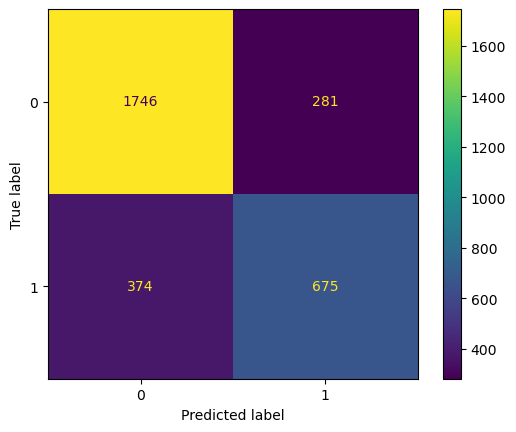

In [64]:
# plot confusion Matrix using matrixDisplay
ConfusionMatrixDisplay.from_estimator( gridMLP, X_test, y_test)
plt.show()

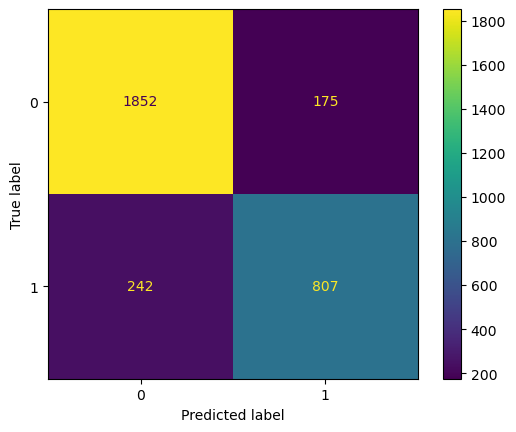

In [65]:
# plot XGBoost confusion Matrix using matrixDisplay
ConfusionMatrixDisplay.from_estimator(grid_XGB, X_test, y_test)
plt.show()

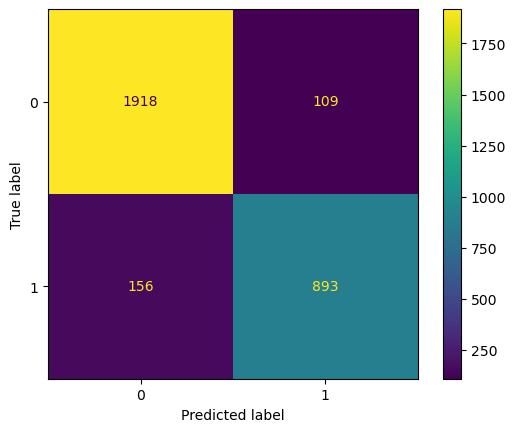

In [66]:
# plot GBC confusion Matrix using matrixDisplay
ConfusionMatrixDisplay.from_estimator( Grid_GBC, X_test, y_test)
plt.show()

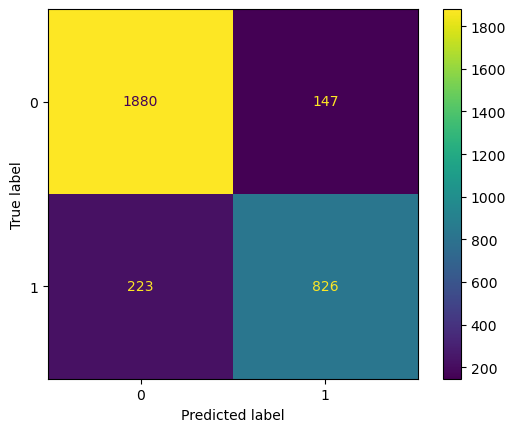

In [67]:
# plot Random forest confusion Matrix using matrixDisplay
ConfusionMatrixDisplay.from_estimator( grid_RF, X_test, y_test)
plt.show()

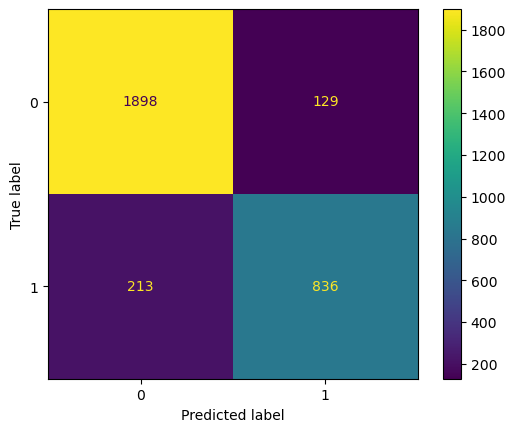

In [68]:
# plot RCatBoost confusion Matrix using matrixDisplay
ConfusionMatrixDisplay.from_estimator( Gridcat, X_test, y_test)
plt.show()

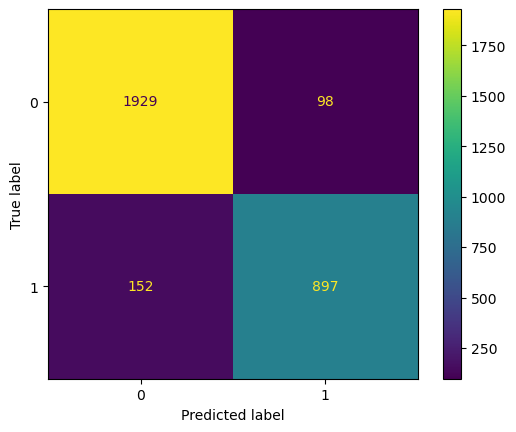

In [69]:
# plot LGBclassifier confusion Matrix using matrixDisplay
ConfusionMatrixDisplay.from_estimator( LBC_cv, X_test, y_test)
plt.show()

## Stacked model

In [70]:
estimator_list = [
    ('MLP',MLPCa),
    ('XGBoost',XGB),
    ('RF',RF),
    ('CatBoost',catboost_hy),
    ('LGBboost',LGB_hy),
     ]
#metaclassifier = LogisticRegression(random_state=123)
#Grid_GBC = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=parametersGBC,cv=10)
LRStack = StackingClassifier(
    estimators=estimator_list, final_estimator=GBC,cv=10)



In [71]:
# Train
LRStack.fit(X_train, y_train)
# Make predictions for test data
y_test_predLR = LRStack.predict(X_test)

0:	learn: 0.5714463	total: 16.3ms	remaining: 16.2s
1:	learn: 0.5214454	total: 31.1ms	remaining: 15.5s
2:	learn: 0.4893019	total: 46.1ms	remaining: 15.3s
3:	learn: 0.4715686	total: 61.2ms	remaining: 15.2s
4:	learn: 0.4585892	total: 76.7ms	remaining: 15.3s
5:	learn: 0.4435288	total: 92.5ms	remaining: 15.3s
6:	learn: 0.4344424	total: 108ms	remaining: 15.3s
7:	learn: 0.4313656	total: 123ms	remaining: 15.2s
8:	learn: 0.4235092	total: 138ms	remaining: 15.2s
9:	learn: 0.4195006	total: 153ms	remaining: 15.1s
10:	learn: 0.4126856	total: 168ms	remaining: 15.1s
11:	learn: 0.4094623	total: 182ms	remaining: 15s
12:	learn: 0.4053061	total: 197ms	remaining: 14.9s
13:	learn: 0.4006527	total: 212ms	remaining: 14.9s
14:	learn: 0.3979403	total: 227ms	remaining: 14.9s
15:	learn: 0.3926249	total: 243ms	remaining: 15s
16:	learn: 0.3906242	total: 259ms	remaining: 15s
17:	learn: 0.3864963	total: 275ms	remaining: 15s
18:	learn: 0.3829941	total: 290ms	remaining: 14.9s
19:	learn: 0.3791874	total: 305ms	remaining

161:	learn: 0.1427755	total: 2.4s	remaining: 12.4s
162:	learn: 0.1418433	total: 2.42s	remaining: 12.4s
163:	learn: 0.1408180	total: 2.44s	remaining: 12.4s
164:	learn: 0.1401828	total: 2.45s	remaining: 12.4s
165:	learn: 0.1394928	total: 2.47s	remaining: 12.4s
166:	learn: 0.1383523	total: 2.48s	remaining: 12.4s
167:	learn: 0.1376248	total: 2.5s	remaining: 12.4s
168:	learn: 0.1369789	total: 2.51s	remaining: 12.4s
169:	learn: 0.1366492	total: 2.52s	remaining: 12.3s
170:	learn: 0.1364516	total: 2.54s	remaining: 12.3s
171:	learn: 0.1356042	total: 2.55s	remaining: 12.3s
172:	learn: 0.1352875	total: 2.57s	remaining: 12.3s
173:	learn: 0.1346467	total: 2.58s	remaining: 12.3s
174:	learn: 0.1338801	total: 2.6s	remaining: 12.2s
175:	learn: 0.1334293	total: 2.61s	remaining: 12.2s
176:	learn: 0.1332314	total: 2.63s	remaining: 12.2s
177:	learn: 0.1323974	total: 2.64s	remaining: 12.2s
178:	learn: 0.1315584	total: 2.65s	remaining: 12.2s
179:	learn: 0.1312888	total: 2.67s	remaining: 12.1s
180:	learn: 0.1

333:	learn: 0.0699387	total: 4.91s	remaining: 9.79s
334:	learn: 0.0696398	total: 4.92s	remaining: 9.78s
335:	learn: 0.0694094	total: 4.94s	remaining: 9.76s
336:	learn: 0.0690748	total: 4.96s	remaining: 9.75s
337:	learn: 0.0690268	total: 4.97s	remaining: 9.74s
338:	learn: 0.0689162	total: 4.99s	remaining: 9.72s
339:	learn: 0.0685136	total: 5s	remaining: 9.71s
340:	learn: 0.0684984	total: 5.02s	remaining: 9.7s
341:	learn: 0.0684335	total: 5.03s	remaining: 9.68s
342:	learn: 0.0681583	total: 5.05s	remaining: 9.67s
343:	learn: 0.0678367	total: 5.07s	remaining: 9.66s
344:	learn: 0.0675440	total: 5.08s	remaining: 9.65s
345:	learn: 0.0670173	total: 5.1s	remaining: 9.63s
346:	learn: 0.0668104	total: 5.11s	remaining: 9.62s
347:	learn: 0.0666072	total: 5.12s	remaining: 9.6s
348:	learn: 0.0664434	total: 5.14s	remaining: 9.59s
349:	learn: 0.0660976	total: 5.15s	remaining: 9.57s
350:	learn: 0.0657708	total: 5.17s	remaining: 9.55s
351:	learn: 0.0656119	total: 5.18s	remaining: 9.54s
352:	learn: 0.0655

505:	learn: 0.0431723	total: 7.45s	remaining: 7.27s
506:	learn: 0.0429765	total: 7.47s	remaining: 7.26s
507:	learn: 0.0429413	total: 7.48s	remaining: 7.25s
508:	learn: 0.0428980	total: 7.5s	remaining: 7.23s
509:	learn: 0.0426737	total: 7.51s	remaining: 7.22s
510:	learn: 0.0426062	total: 7.53s	remaining: 7.21s
511:	learn: 0.0424673	total: 7.55s	remaining: 7.19s
512:	learn: 0.0423503	total: 7.56s	remaining: 7.18s
513:	learn: 0.0422090	total: 7.58s	remaining: 7.16s
514:	learn: 0.0421466	total: 7.59s	remaining: 7.15s
515:	learn: 0.0420452	total: 7.6s	remaining: 7.13s
516:	learn: 0.0419245	total: 7.62s	remaining: 7.12s
517:	learn: 0.0418031	total: 7.63s	remaining: 7.1s
518:	learn: 0.0417348	total: 7.65s	remaining: 7.09s
519:	learn: 0.0417106	total: 7.66s	remaining: 7.08s
520:	learn: 0.0416327	total: 7.68s	remaining: 7.06s
521:	learn: 0.0415321	total: 7.69s	remaining: 7.05s
522:	learn: 0.0414172	total: 7.71s	remaining: 7.03s
523:	learn: 0.0413360	total: 7.72s	remaining: 7.02s
524:	learn: 0.0

678:	learn: 0.0294022	total: 10s	remaining: 4.74s
679:	learn: 0.0293612	total: 10s	remaining: 4.72s
680:	learn: 0.0293438	total: 10s	remaining: 4.71s
681:	learn: 0.0292624	total: 10.1s	remaining: 4.69s
682:	learn: 0.0292167	total: 10.1s	remaining: 4.68s
683:	learn: 0.0291466	total: 10.1s	remaining: 4.66s
684:	learn: 0.0291257	total: 10.1s	remaining: 4.65s
685:	learn: 0.0290617	total: 10.1s	remaining: 4.63s
686:	learn: 0.0290435	total: 10.1s	remaining: 4.62s
687:	learn: 0.0290213	total: 10.1s	remaining: 4.6s
688:	learn: 0.0289844	total: 10.2s	remaining: 4.59s
689:	learn: 0.0289161	total: 10.2s	remaining: 4.57s
690:	learn: 0.0288203	total: 10.2s	remaining: 4.56s
691:	learn: 0.0287442	total: 10.2s	remaining: 4.54s
692:	learn: 0.0286786	total: 10.2s	remaining: 4.53s
693:	learn: 0.0286459	total: 10.2s	remaining: 4.51s
694:	learn: 0.0286084	total: 10.3s	remaining: 4.5s
695:	learn: 0.0285765	total: 10.3s	remaining: 4.49s
696:	learn: 0.0285618	total: 10.3s	remaining: 4.47s
697:	learn: 0.028546

837:	learn: 0.0221453	total: 12.4s	remaining: 2.39s
838:	learn: 0.0221187	total: 12.4s	remaining: 2.38s
839:	learn: 0.0220475	total: 12.4s	remaining: 2.36s
840:	learn: 0.0220312	total: 12.4s	remaining: 2.35s
841:	learn: 0.0219846	total: 12.4s	remaining: 2.33s
842:	learn: 0.0219434	total: 12.4s	remaining: 2.32s
843:	learn: 0.0218934	total: 12.5s	remaining: 2.3s
844:	learn: 0.0218529	total: 12.5s	remaining: 2.29s
845:	learn: 0.0218121	total: 12.5s	remaining: 2.27s
846:	learn: 0.0217650	total: 12.5s	remaining: 2.26s
847:	learn: 0.0217136	total: 12.5s	remaining: 2.25s
848:	learn: 0.0217001	total: 12.5s	remaining: 2.23s
849:	learn: 0.0216745	total: 12.6s	remaining: 2.22s
850:	learn: 0.0216387	total: 12.6s	remaining: 2.2s
851:	learn: 0.0216199	total: 12.6s	remaining: 2.19s
852:	learn: 0.0215816	total: 12.6s	remaining: 2.17s
853:	learn: 0.0215667	total: 12.6s	remaining: 2.16s
854:	learn: 0.0215065	total: 12.6s	remaining: 2.14s
855:	learn: 0.0214926	total: 12.6s	remaining: 2.13s
856:	learn: 0.

997:	learn: 0.0177959	total: 14.7s	remaining: 29.5ms
998:	learn: 0.0177506	total: 14.7s	remaining: 14.8ms
999:	learn: 0.0177238	total: 14.8s	remaining: 0us
0:	learn: 0.5701150	total: 18.3ms	remaining: 18.3s
1:	learn: 0.5153321	total: 35.7ms	remaining: 17.8s
2:	learn: 0.4862703	total: 52.9ms	remaining: 17.6s
3:	learn: 0.4681994	total: 70.7ms	remaining: 17.6s
4:	learn: 0.4555167	total: 88ms	remaining: 17.5s
5:	learn: 0.4466677	total: 104ms	remaining: 17.3s
6:	learn: 0.4406798	total: 120ms	remaining: 17s
7:	learn: 0.4321007	total: 135ms	remaining: 16.7s
8:	learn: 0.4256612	total: 149ms	remaining: 16.4s
9:	learn: 0.4180915	total: 163ms	remaining: 16.2s
10:	learn: 0.4162831	total: 177ms	remaining: 15.9s
11:	learn: 0.4136291	total: 192ms	remaining: 15.8s
12:	learn: 0.4090243	total: 206ms	remaining: 15.7s
13:	learn: 0.4052457	total: 221ms	remaining: 15.6s
14:	learn: 0.4019666	total: 237ms	remaining: 15.6s
15:	learn: 0.3947733	total: 253ms	remaining: 15.6s
16:	learn: 0.3886223	total: 268ms	rem

170:	learn: 0.1335069	total: 2.57s	remaining: 12.5s
171:	learn: 0.1329334	total: 2.59s	remaining: 12.5s
172:	learn: 0.1327025	total: 2.6s	remaining: 12.4s
173:	learn: 0.1319645	total: 2.62s	remaining: 12.4s
174:	learn: 0.1312784	total: 2.63s	remaining: 12.4s
175:	learn: 0.1311129	total: 2.65s	remaining: 12.4s
176:	learn: 0.1308040	total: 2.66s	remaining: 12.4s
177:	learn: 0.1300762	total: 2.68s	remaining: 12.4s
178:	learn: 0.1295340	total: 2.69s	remaining: 12.3s
179:	learn: 0.1293307	total: 2.71s	remaining: 12.3s
180:	learn: 0.1289150	total: 2.72s	remaining: 12.3s
181:	learn: 0.1285313	total: 2.73s	remaining: 12.3s
182:	learn: 0.1279757	total: 2.75s	remaining: 12.3s
183:	learn: 0.1271749	total: 2.77s	remaining: 12.3s
184:	learn: 0.1265530	total: 2.78s	remaining: 12.2s
185:	learn: 0.1260331	total: 2.79s	remaining: 12.2s
186:	learn: 0.1258931	total: 2.81s	remaining: 12.2s
187:	learn: 0.1252978	total: 2.82s	remaining: 12.2s
188:	learn: 0.1243922	total: 2.84s	remaining: 12.2s
189:	learn: 0

341:	learn: 0.0659187	total: 5.14s	remaining: 9.89s
342:	learn: 0.0657856	total: 5.15s	remaining: 9.87s
343:	learn: 0.0655848	total: 5.17s	remaining: 9.86s
344:	learn: 0.0654776	total: 5.18s	remaining: 9.84s
345:	learn: 0.0653491	total: 5.2s	remaining: 9.82s
346:	learn: 0.0651795	total: 5.21s	remaining: 9.81s
347:	learn: 0.0649739	total: 5.23s	remaining: 9.79s
348:	learn: 0.0648419	total: 5.24s	remaining: 9.78s
349:	learn: 0.0646471	total: 5.26s	remaining: 9.77s
350:	learn: 0.0641996	total: 5.28s	remaining: 9.76s
351:	learn: 0.0640347	total: 5.29s	remaining: 9.75s
352:	learn: 0.0637762	total: 5.31s	remaining: 9.73s
353:	learn: 0.0635637	total: 5.33s	remaining: 9.72s
354:	learn: 0.0632925	total: 5.35s	remaining: 9.72s
355:	learn: 0.0629929	total: 5.37s	remaining: 9.71s
356:	learn: 0.0627917	total: 5.38s	remaining: 9.7s
357:	learn: 0.0626943	total: 5.4s	remaining: 9.68s
358:	learn: 0.0625726	total: 5.42s	remaining: 9.67s
359:	learn: 0.0625385	total: 5.43s	remaining: 9.66s
360:	learn: 0.0

509:	learn: 0.0422634	total: 7.69s	remaining: 7.39s
510:	learn: 0.0421534	total: 7.7s	remaining: 7.37s
511:	learn: 0.0420216	total: 7.72s	remaining: 7.36s
512:	learn: 0.0420012	total: 7.73s	remaining: 7.34s
513:	learn: 0.0419209	total: 7.75s	remaining: 7.33s
514:	learn: 0.0417956	total: 7.76s	remaining: 7.31s
515:	learn: 0.0417340	total: 7.78s	remaining: 7.29s
516:	learn: 0.0417264	total: 7.79s	remaining: 7.28s
517:	learn: 0.0416724	total: 7.8s	remaining: 7.26s
518:	learn: 0.0416100	total: 7.82s	remaining: 7.25s
519:	learn: 0.0415190	total: 7.83s	remaining: 7.23s
520:	learn: 0.0414181	total: 7.85s	remaining: 7.22s
521:	learn: 0.0412934	total: 7.86s	remaining: 7.2s
522:	learn: 0.0411331	total: 7.88s	remaining: 7.18s
523:	learn: 0.0410664	total: 7.89s	remaining: 7.17s
524:	learn: 0.0409165	total: 7.91s	remaining: 7.15s
525:	learn: 0.0407988	total: 7.92s	remaining: 7.14s
526:	learn: 0.0406592	total: 7.94s	remaining: 7.12s
527:	learn: 0.0406309	total: 7.95s	remaining: 7.11s
528:	learn: 0.0

679:	learn: 0.0289842	total: 10.2s	remaining: 4.82s
680:	learn: 0.0289794	total: 10.3s	remaining: 4.8s
681:	learn: 0.0288826	total: 10.3s	remaining: 4.79s
682:	learn: 0.0288352	total: 10.3s	remaining: 4.77s
683:	learn: 0.0288027	total: 10.3s	remaining: 4.76s
684:	learn: 0.0287403	total: 10.3s	remaining: 4.74s
685:	learn: 0.0287039	total: 10.3s	remaining: 4.73s
686:	learn: 0.0287037	total: 10.3s	remaining: 4.71s
687:	learn: 0.0286385	total: 10.4s	remaining: 4.7s
688:	learn: 0.0285764	total: 10.4s	remaining: 4.68s
689:	learn: 0.0285401	total: 10.4s	remaining: 4.67s
690:	learn: 0.0284597	total: 10.4s	remaining: 4.65s
691:	learn: 0.0284014	total: 10.4s	remaining: 4.63s
692:	learn: 0.0283559	total: 10.4s	remaining: 4.62s
693:	learn: 0.0283000	total: 10.4s	remaining: 4.6s
694:	learn: 0.0282501	total: 10.5s	remaining: 4.59s
695:	learn: 0.0281071	total: 10.5s	remaining: 4.57s
696:	learn: 0.0280604	total: 10.5s	remaining: 4.56s
697:	learn: 0.0279775	total: 10.5s	remaining: 4.54s
698:	learn: 0.0

846:	learn: 0.0218683	total: 12.8s	remaining: 2.31s
847:	learn: 0.0217887	total: 12.8s	remaining: 2.3s
848:	learn: 0.0217708	total: 12.8s	remaining: 2.28s
849:	learn: 0.0217611	total: 12.8s	remaining: 2.27s
850:	learn: 0.0217436	total: 12.9s	remaining: 2.25s
851:	learn: 0.0217065	total: 12.9s	remaining: 2.24s
852:	learn: 0.0216476	total: 12.9s	remaining: 2.22s
853:	learn: 0.0216271	total: 12.9s	remaining: 2.21s
854:	learn: 0.0216270	total: 12.9s	remaining: 2.19s
855:	learn: 0.0216160	total: 12.9s	remaining: 2.17s
856:	learn: 0.0216151	total: 12.9s	remaining: 2.16s
857:	learn: 0.0216111	total: 13s	remaining: 2.15s
858:	learn: 0.0216096	total: 13s	remaining: 2.13s
859:	learn: 0.0215794	total: 13s	remaining: 2.12s
860:	learn: 0.0215738	total: 13s	remaining: 2.1s
861:	learn: 0.0215206	total: 13s	remaining: 2.08s
862:	learn: 0.0215048	total: 13s	remaining: 2.07s
863:	learn: 0.0214901	total: 13.1s	remaining: 2.05s
864:	learn: 0.0214642	total: 13.1s	remaining: 2.04s
865:	learn: 0.0214360	tota

16:	learn: 0.3849897	total: 283ms	remaining: 16.4s
17:	learn: 0.3809620	total: 301ms	remaining: 16.4s
18:	learn: 0.3765128	total: 319ms	remaining: 16.5s
19:	learn: 0.3715534	total: 336ms	remaining: 16.5s
20:	learn: 0.3686251	total: 353ms	remaining: 16.5s
21:	learn: 0.3659811	total: 370ms	remaining: 16.5s
22:	learn: 0.3614696	total: 386ms	remaining: 16.4s
23:	learn: 0.3604454	total: 402ms	remaining: 16.3s
24:	learn: 0.3577509	total: 418ms	remaining: 16.3s
25:	learn: 0.3541658	total: 433ms	remaining: 16.2s
26:	learn: 0.3514004	total: 448ms	remaining: 16.1s
27:	learn: 0.3490770	total: 464ms	remaining: 16.1s
28:	learn: 0.3479622	total: 479ms	remaining: 16s
29:	learn: 0.3445442	total: 495ms	remaining: 16s
30:	learn: 0.3413560	total: 510ms	remaining: 15.9s
31:	learn: 0.3402836	total: 525ms	remaining: 15.9s
32:	learn: 0.3369270	total: 540ms	remaining: 15.8s
33:	learn: 0.3331885	total: 555ms	remaining: 15.8s
34:	learn: 0.3276381	total: 570ms	remaining: 15.7s
35:	learn: 0.3246043	total: 584ms	r

177:	learn: 0.1316971	total: 2.8s	remaining: 12.9s
178:	learn: 0.1310586	total: 2.82s	remaining: 12.9s
179:	learn: 0.1307716	total: 2.83s	remaining: 12.9s
180:	learn: 0.1304124	total: 2.85s	remaining: 12.9s
181:	learn: 0.1299180	total: 2.86s	remaining: 12.9s
182:	learn: 0.1288209	total: 2.88s	remaining: 12.8s
183:	learn: 0.1283936	total: 2.89s	remaining: 12.8s
184:	learn: 0.1279332	total: 2.91s	remaining: 12.8s
185:	learn: 0.1271165	total: 2.92s	remaining: 12.8s
186:	learn: 0.1263855	total: 2.94s	remaining: 12.8s
187:	learn: 0.1258369	total: 2.95s	remaining: 12.7s
188:	learn: 0.1255007	total: 2.96s	remaining: 12.7s
189:	learn: 0.1249277	total: 2.98s	remaining: 12.7s
190:	learn: 0.1244040	total: 3s	remaining: 12.7s
191:	learn: 0.1238714	total: 3.01s	remaining: 12.7s
192:	learn: 0.1233676	total: 3.02s	remaining: 12.6s
193:	learn: 0.1225805	total: 3.04s	remaining: 12.6s
194:	learn: 0.1221248	total: 3.05s	remaining: 12.6s
195:	learn: 0.1215322	total: 3.07s	remaining: 12.6s
196:	learn: 0.12

344:	learn: 0.0665517	total: 5.38s	remaining: 10.2s
345:	learn: 0.0664672	total: 5.39s	remaining: 10.2s
346:	learn: 0.0660174	total: 5.41s	remaining: 10.2s
347:	learn: 0.0657719	total: 5.43s	remaining: 10.2s
348:	learn: 0.0654950	total: 5.44s	remaining: 10.2s
349:	learn: 0.0651678	total: 5.46s	remaining: 10.1s
350:	learn: 0.0649756	total: 5.47s	remaining: 10.1s
351:	learn: 0.0647805	total: 5.49s	remaining: 10.1s
352:	learn: 0.0645790	total: 5.5s	remaining: 10.1s
353:	learn: 0.0643379	total: 5.52s	remaining: 10.1s
354:	learn: 0.0642309	total: 5.54s	remaining: 10.1s
355:	learn: 0.0639579	total: 5.55s	remaining: 10s
356:	learn: 0.0636559	total: 5.57s	remaining: 10s
357:	learn: 0.0635635	total: 5.58s	remaining: 10s
358:	learn: 0.0631758	total: 5.6s	remaining: 10s
359:	learn: 0.0627953	total: 5.62s	remaining: 9.98s
360:	learn: 0.0625142	total: 5.63s	remaining: 9.97s
361:	learn: 0.0623161	total: 5.65s	remaining: 9.95s
362:	learn: 0.0620474	total: 5.66s	remaining: 9.94s
363:	learn: 0.0618367	

505:	learn: 0.0423726	total: 7.91s	remaining: 7.72s
506:	learn: 0.0422111	total: 7.93s	remaining: 7.71s
507:	learn: 0.0420951	total: 7.94s	remaining: 7.69s
508:	learn: 0.0419489	total: 7.96s	remaining: 7.68s
509:	learn: 0.0418126	total: 7.97s	remaining: 7.66s
510:	learn: 0.0417159	total: 7.99s	remaining: 7.64s
511:	learn: 0.0415797	total: 8s	remaining: 7.63s
512:	learn: 0.0413418	total: 8.02s	remaining: 7.61s
513:	learn: 0.0412197	total: 8.03s	remaining: 7.6s
514:	learn: 0.0411589	total: 8.05s	remaining: 7.58s
515:	learn: 0.0410872	total: 8.06s	remaining: 7.57s
516:	learn: 0.0409950	total: 8.08s	remaining: 7.55s
517:	learn: 0.0408905	total: 8.1s	remaining: 7.53s
518:	learn: 0.0407696	total: 8.11s	remaining: 7.52s
519:	learn: 0.0407185	total: 8.13s	remaining: 7.5s
520:	learn: 0.0406599	total: 8.14s	remaining: 7.49s
521:	learn: 0.0405123	total: 8.16s	remaining: 7.47s
522:	learn: 0.0403849	total: 8.17s	remaining: 7.45s
523:	learn: 0.0403470	total: 8.19s	remaining: 7.44s
524:	learn: 0.0402

668:	learn: 0.0290745	total: 10.4s	remaining: 5.17s
669:	learn: 0.0290440	total: 10.5s	remaining: 5.15s
670:	learn: 0.0290033	total: 10.5s	remaining: 5.13s
671:	learn: 0.0289595	total: 10.5s	remaining: 5.12s
672:	learn: 0.0288754	total: 10.5s	remaining: 5.1s
673:	learn: 0.0288300	total: 10.5s	remaining: 5.09s
674:	learn: 0.0287996	total: 10.5s	remaining: 5.07s
675:	learn: 0.0287428	total: 10.5s	remaining: 5.05s
676:	learn: 0.0286774	total: 10.6s	remaining: 5.04s
677:	learn: 0.0286272	total: 10.6s	remaining: 5.02s
678:	learn: 0.0285567	total: 10.6s	remaining: 5.01s
679:	learn: 0.0285215	total: 10.6s	remaining: 4.99s
680:	learn: 0.0285004	total: 10.6s	remaining: 4.97s
681:	learn: 0.0284983	total: 10.6s	remaining: 4.96s
682:	learn: 0.0284646	total: 10.6s	remaining: 4.94s
683:	learn: 0.0284234	total: 10.7s	remaining: 4.93s
684:	learn: 0.0283976	total: 10.7s	remaining: 4.91s
685:	learn: 0.0283922	total: 10.7s	remaining: 4.89s
686:	learn: 0.0283387	total: 10.7s	remaining: 4.88s
687:	learn: 0

835:	learn: 0.0216334	total: 13s	remaining: 2.55s
836:	learn: 0.0216285	total: 13s	remaining: 2.54s
837:	learn: 0.0215971	total: 13.1s	remaining: 2.52s
838:	learn: 0.0215515	total: 13.1s	remaining: 2.51s
839:	learn: 0.0215187	total: 13.1s	remaining: 2.49s
840:	learn: 0.0214565	total: 13.1s	remaining: 2.48s
841:	learn: 0.0214167	total: 13.1s	remaining: 2.46s
842:	learn: 0.0213872	total: 13.1s	remaining: 2.45s
843:	learn: 0.0213381	total: 13.2s	remaining: 2.43s
844:	learn: 0.0213279	total: 13.2s	remaining: 2.42s
845:	learn: 0.0212726	total: 13.2s	remaining: 2.4s
846:	learn: 0.0212480	total: 13.2s	remaining: 2.39s
847:	learn: 0.0212413	total: 13.2s	remaining: 2.37s
848:	learn: 0.0212052	total: 13.2s	remaining: 2.35s
849:	learn: 0.0211929	total: 13.3s	remaining: 2.34s
850:	learn: 0.0211667	total: 13.3s	remaining: 2.32s
851:	learn: 0.0211009	total: 13.3s	remaining: 2.31s
852:	learn: 0.0210395	total: 13.3s	remaining: 2.29s
853:	learn: 0.0210024	total: 13.3s	remaining: 2.28s
854:	learn: 0.020

994:	learn: 0.0171925	total: 15.6s	remaining: 78.3ms
995:	learn: 0.0171740	total: 15.6s	remaining: 62.6ms
996:	learn: 0.0171656	total: 15.6s	remaining: 47ms
997:	learn: 0.0171655	total: 15.6s	remaining: 31.3ms
998:	learn: 0.0171405	total: 15.6s	remaining: 15.7ms
999:	learn: 0.0171045	total: 15.7s	remaining: 0us
0:	learn: 0.5777669	total: 17.3ms	remaining: 17.3s
1:	learn: 0.5207914	total: 34ms	remaining: 17s
2:	learn: 0.4881297	total: 50.7ms	remaining: 16.8s
3:	learn: 0.4700155	total: 66.8ms	remaining: 16.6s
4:	learn: 0.4572266	total: 83.6ms	remaining: 16.6s
5:	learn: 0.4458904	total: 99.3ms	remaining: 16.5s
6:	learn: 0.4367461	total: 115ms	remaining: 16.3s
7:	learn: 0.4311877	total: 131ms	remaining: 16.2s
8:	learn: 0.4246853	total: 147ms	remaining: 16.1s
9:	learn: 0.4202450	total: 162ms	remaining: 16.1s
10:	learn: 0.4184800	total: 178ms	remaining: 16s
11:	learn: 0.4157918	total: 194ms	remaining: 15.9s
12:	learn: 0.4119902	total: 209ms	remaining: 15.8s
13:	learn: 0.4058802	total: 225ms	

162:	learn: 0.1430814	total: 2.61s	remaining: 13.4s
163:	learn: 0.1424811	total: 2.63s	remaining: 13.4s
164:	learn: 0.1424739	total: 2.64s	remaining: 13.4s
165:	learn: 0.1421592	total: 2.66s	remaining: 13.3s
166:	learn: 0.1417069	total: 2.67s	remaining: 13.3s
167:	learn: 0.1409093	total: 2.69s	remaining: 13.3s
168:	learn: 0.1405388	total: 2.7s	remaining: 13.3s
169:	learn: 0.1396501	total: 2.72s	remaining: 13.3s
170:	learn: 0.1389862	total: 2.73s	remaining: 13.2s
171:	learn: 0.1380181	total: 2.75s	remaining: 13.2s
172:	learn: 0.1374491	total: 2.76s	remaining: 13.2s
173:	learn: 0.1368810	total: 2.78s	remaining: 13.2s
174:	learn: 0.1360851	total: 2.79s	remaining: 13.2s
175:	learn: 0.1353902	total: 2.81s	remaining: 13.2s
176:	learn: 0.1349632	total: 2.83s	remaining: 13.2s
177:	learn: 0.1341560	total: 2.85s	remaining: 13.1s
178:	learn: 0.1331989	total: 2.86s	remaining: 13.1s
179:	learn: 0.1321970	total: 2.88s	remaining: 13.1s
180:	learn: 0.1320628	total: 2.9s	remaining: 13.1s
181:	learn: 0.

325:	learn: 0.0749736	total: 5.22s	remaining: 10.8s
326:	learn: 0.0747595	total: 5.24s	remaining: 10.8s
327:	learn: 0.0745481	total: 5.25s	remaining: 10.8s
328:	learn: 0.0742976	total: 5.27s	remaining: 10.7s
329:	learn: 0.0739582	total: 5.28s	remaining: 10.7s
330:	learn: 0.0736450	total: 5.3s	remaining: 10.7s
331:	learn: 0.0733352	total: 5.32s	remaining: 10.7s
332:	learn: 0.0731553	total: 5.33s	remaining: 10.7s
333:	learn: 0.0730621	total: 5.34s	remaining: 10.7s
334:	learn: 0.0727492	total: 5.36s	remaining: 10.6s
335:	learn: 0.0724298	total: 5.38s	remaining: 10.6s
336:	learn: 0.0722856	total: 5.39s	remaining: 10.6s
337:	learn: 0.0721842	total: 5.41s	remaining: 10.6s
338:	learn: 0.0719593	total: 5.42s	remaining: 10.6s
339:	learn: 0.0717587	total: 5.44s	remaining: 10.6s
340:	learn: 0.0714228	total: 5.46s	remaining: 10.5s
341:	learn: 0.0712067	total: 5.47s	remaining: 10.5s
342:	learn: 0.0711438	total: 5.49s	remaining: 10.5s
343:	learn: 0.0709100	total: 5.5s	remaining: 10.5s
344:	learn: 0.

485:	learn: 0.0460587	total: 7.74s	remaining: 8.19s
486:	learn: 0.0460431	total: 7.76s	remaining: 8.17s
487:	learn: 0.0459893	total: 7.78s	remaining: 8.16s
488:	learn: 0.0458184	total: 7.79s	remaining: 8.14s
489:	learn: 0.0456263	total: 7.81s	remaining: 8.13s
490:	learn: 0.0456189	total: 7.83s	remaining: 8.11s
491:	learn: 0.0456151	total: 7.84s	remaining: 8.1s
492:	learn: 0.0455134	total: 7.86s	remaining: 8.09s
493:	learn: 0.0454088	total: 7.88s	remaining: 8.07s
494:	learn: 0.0453132	total: 7.9s	remaining: 8.06s
495:	learn: 0.0451612	total: 7.92s	remaining: 8.04s
496:	learn: 0.0449767	total: 7.93s	remaining: 8.03s
497:	learn: 0.0449517	total: 7.95s	remaining: 8.01s
498:	learn: 0.0447740	total: 7.96s	remaining: 8s
499:	learn: 0.0447098	total: 7.98s	remaining: 7.98s
500:	learn: 0.0446684	total: 8s	remaining: 7.96s
501:	learn: 0.0445460	total: 8.01s	remaining: 7.95s
502:	learn: 0.0444785	total: 8.03s	remaining: 7.93s
503:	learn: 0.0443104	total: 8.04s	remaining: 7.92s
504:	learn: 0.044217

649:	learn: 0.0315202	total: 10.3s	remaining: 5.56s
650:	learn: 0.0314388	total: 10.3s	remaining: 5.55s
651:	learn: 0.0313917	total: 10.4s	remaining: 5.53s
652:	learn: 0.0313554	total: 10.4s	remaining: 5.51s
653:	learn: 0.0313000	total: 10.4s	remaining: 5.5s
654:	learn: 0.0312214	total: 10.4s	remaining: 5.48s
655:	learn: 0.0311403	total: 10.4s	remaining: 5.47s
656:	learn: 0.0311115	total: 10.4s	remaining: 5.45s
657:	learn: 0.0310166	total: 10.5s	remaining: 5.43s
658:	learn: 0.0309720	total: 10.5s	remaining: 5.42s
659:	learn: 0.0309151	total: 10.5s	remaining: 5.4s
660:	learn: 0.0308889	total: 10.5s	remaining: 5.38s
661:	learn: 0.0307782	total: 10.5s	remaining: 5.37s
662:	learn: 0.0306760	total: 10.5s	remaining: 5.35s
663:	learn: 0.0305814	total: 10.5s	remaining: 5.34s
664:	learn: 0.0305681	total: 10.6s	remaining: 5.32s
665:	learn: 0.0305656	total: 10.6s	remaining: 5.3s
666:	learn: 0.0305225	total: 10.6s	remaining: 5.29s
667:	learn: 0.0304488	total: 10.6s	remaining: 5.27s
668:	learn: 0.0

808:	learn: 0.0237110	total: 12.9s	remaining: 3.05s
809:	learn: 0.0236321	total: 12.9s	remaining: 3.03s
810:	learn: 0.0235999	total: 12.9s	remaining: 3.02s
811:	learn: 0.0235590	total: 13s	remaining: 3s
812:	learn: 0.0235248	total: 13s	remaining: 2.98s
813:	learn: 0.0234834	total: 13s	remaining: 2.97s
814:	learn: 0.0234262	total: 13s	remaining: 2.95s
815:	learn: 0.0233863	total: 13s	remaining: 2.94s
816:	learn: 0.0233596	total: 13s	remaining: 2.92s
817:	learn: 0.0233314	total: 13s	remaining: 2.9s
818:	learn: 0.0232867	total: 13.1s	remaining: 2.89s
819:	learn: 0.0232310	total: 13.1s	remaining: 2.87s
820:	learn: 0.0231580	total: 13.1s	remaining: 2.85s
821:	learn: 0.0230921	total: 13.1s	remaining: 2.84s
822:	learn: 0.0230568	total: 13.1s	remaining: 2.82s
823:	learn: 0.0230105	total: 13.1s	remaining: 2.81s
824:	learn: 0.0229816	total: 13.2s	remaining: 2.79s
825:	learn: 0.0228955	total: 13.2s	remaining: 2.77s
826:	learn: 0.0228641	total: 13.2s	remaining: 2.76s
827:	learn: 0.0228415	total: 1

971:	learn: 0.0182604	total: 15.5s	remaining: 446ms
972:	learn: 0.0182604	total: 15.5s	remaining: 430ms
973:	learn: 0.0182280	total: 15.5s	remaining: 414ms
974:	learn: 0.0181983	total: 15.5s	remaining: 398ms
975:	learn: 0.0181627	total: 15.5s	remaining: 382ms
976:	learn: 0.0181492	total: 15.6s	remaining: 366ms
977:	learn: 0.0181157	total: 15.6s	remaining: 350ms
978:	learn: 0.0180748	total: 15.6s	remaining: 334ms
979:	learn: 0.0180546	total: 15.6s	remaining: 319ms
980:	learn: 0.0180481	total: 15.6s	remaining: 303ms
981:	learn: 0.0180257	total: 15.6s	remaining: 287ms
982:	learn: 0.0180247	total: 15.7s	remaining: 271ms
983:	learn: 0.0180246	total: 15.7s	remaining: 255ms
984:	learn: 0.0180245	total: 15.7s	remaining: 239ms
985:	learn: 0.0179982	total: 15.7s	remaining: 223ms
986:	learn: 0.0179866	total: 15.7s	remaining: 207ms
987:	learn: 0.0179866	total: 15.7s	remaining: 191ms
988:	learn: 0.0179649	total: 15.7s	remaining: 175ms
989:	learn: 0.0179320	total: 15.8s	remaining: 159ms
990:	learn: 

132:	learn: 0.1679245	total: 2.14s	remaining: 14s
133:	learn: 0.1665373	total: 2.16s	remaining: 14s
134:	learn: 0.1656030	total: 2.17s	remaining: 13.9s
135:	learn: 0.1651067	total: 2.19s	remaining: 13.9s
136:	learn: 0.1640673	total: 2.2s	remaining: 13.9s
137:	learn: 0.1631582	total: 2.22s	remaining: 13.9s
138:	learn: 0.1621584	total: 2.23s	remaining: 13.8s
139:	learn: 0.1608339	total: 2.25s	remaining: 13.8s
140:	learn: 0.1594986	total: 2.26s	remaining: 13.8s
141:	learn: 0.1584749	total: 2.28s	remaining: 13.8s
142:	learn: 0.1577464	total: 2.29s	remaining: 13.8s
143:	learn: 0.1567250	total: 2.31s	remaining: 13.7s
144:	learn: 0.1561843	total: 2.33s	remaining: 13.7s
145:	learn: 0.1550411	total: 2.34s	remaining: 13.7s
146:	learn: 0.1542284	total: 2.35s	remaining: 13.7s
147:	learn: 0.1533328	total: 2.37s	remaining: 13.7s
148:	learn: 0.1530930	total: 2.39s	remaining: 13.6s
149:	learn: 0.1519908	total: 2.4s	remaining: 13.6s
150:	learn: 0.1508567	total: 2.42s	remaining: 13.6s
151:	learn: 0.1498

297:	learn: 0.0812246	total: 4.74s	remaining: 11.2s
298:	learn: 0.0805968	total: 4.76s	remaining: 11.2s
299:	learn: 0.0801810	total: 4.78s	remaining: 11.1s
300:	learn: 0.0798874	total: 4.79s	remaining: 11.1s
301:	learn: 0.0795550	total: 4.81s	remaining: 11.1s
302:	learn: 0.0793490	total: 4.82s	remaining: 11.1s
303:	learn: 0.0790354	total: 4.84s	remaining: 11.1s
304:	learn: 0.0785627	total: 4.85s	remaining: 11.1s
305:	learn: 0.0779920	total: 4.87s	remaining: 11s
306:	learn: 0.0775537	total: 4.88s	remaining: 11s
307:	learn: 0.0774584	total: 4.9s	remaining: 11s
308:	learn: 0.0771851	total: 4.91s	remaining: 11s
309:	learn: 0.0767812	total: 4.93s	remaining: 11s
310:	learn: 0.0766184	total: 4.95s	remaining: 11s
311:	learn: 0.0762805	total: 4.96s	remaining: 10.9s
312:	learn: 0.0760026	total: 4.98s	remaining: 10.9s
313:	learn: 0.0757503	total: 4.99s	remaining: 10.9s
314:	learn: 0.0753795	total: 5.01s	remaining: 10.9s
315:	learn: 0.0751258	total: 5.02s	remaining: 10.9s
316:	learn: 0.0749792	tot

458:	learn: 0.0473989	total: 7.33s	remaining: 8.63s
459:	learn: 0.0472232	total: 7.34s	remaining: 8.62s
460:	learn: 0.0471413	total: 7.36s	remaining: 8.6s
461:	learn: 0.0470491	total: 7.37s	remaining: 8.59s
462:	learn: 0.0469194	total: 7.39s	remaining: 8.57s
463:	learn: 0.0467160	total: 7.41s	remaining: 8.56s
464:	learn: 0.0465463	total: 7.42s	remaining: 8.54s
465:	learn: 0.0464624	total: 7.44s	remaining: 8.52s
466:	learn: 0.0463298	total: 7.45s	remaining: 8.51s
467:	learn: 0.0462701	total: 7.47s	remaining: 8.49s
468:	learn: 0.0462083	total: 7.49s	remaining: 8.48s
469:	learn: 0.0460911	total: 7.5s	remaining: 8.46s
470:	learn: 0.0459320	total: 7.52s	remaining: 8.45s
471:	learn: 0.0459227	total: 7.54s	remaining: 8.43s
472:	learn: 0.0457712	total: 7.55s	remaining: 8.41s
473:	learn: 0.0457063	total: 7.57s	remaining: 8.4s
474:	learn: 0.0456944	total: 7.58s	remaining: 8.38s
475:	learn: 0.0455712	total: 7.6s	remaining: 8.36s
476:	learn: 0.0454097	total: 7.61s	remaining: 8.35s
477:	learn: 0.04

617:	learn: 0.0325572	total: 9.88s	remaining: 6.1s
618:	learn: 0.0324698	total: 9.89s	remaining: 6.09s
619:	learn: 0.0324024	total: 9.91s	remaining: 6.07s
620:	learn: 0.0323438	total: 9.92s	remaining: 6.06s
621:	learn: 0.0323366	total: 9.94s	remaining: 6.04s
622:	learn: 0.0322859	total: 9.96s	remaining: 6.03s
623:	learn: 0.0322137	total: 9.97s	remaining: 6.01s
624:	learn: 0.0321326	total: 9.99s	remaining: 6s
625:	learn: 0.0320644	total: 10s	remaining: 5.98s
626:	learn: 0.0320171	total: 10s	remaining: 5.96s
627:	learn: 0.0319666	total: 10s	remaining: 5.95s
628:	learn: 0.0319189	total: 10.1s	remaining: 5.93s
629:	learn: 0.0318676	total: 10.1s	remaining: 5.92s
630:	learn: 0.0317745	total: 10.1s	remaining: 5.9s
631:	learn: 0.0316877	total: 10.1s	remaining: 5.89s
632:	learn: 0.0316196	total: 10.1s	remaining: 5.87s
633:	learn: 0.0315615	total: 10.1s	remaining: 5.86s
634:	learn: 0.0315023	total: 10.2s	remaining: 5.84s
635:	learn: 0.0314414	total: 10.2s	remaining: 5.83s
636:	learn: 0.0314133	t

788:	learn: 0.0242712	total: 12.6s	remaining: 3.38s
789:	learn: 0.0242595	total: 12.6s	remaining: 3.36s
790:	learn: 0.0242424	total: 12.7s	remaining: 3.34s
791:	learn: 0.0242084	total: 12.7s	remaining: 3.33s
792:	learn: 0.0241720	total: 12.7s	remaining: 3.31s
793:	learn: 0.0241477	total: 12.7s	remaining: 3.3s
794:	learn: 0.0241143	total: 12.7s	remaining: 3.28s
795:	learn: 0.0241010	total: 12.7s	remaining: 3.27s
796:	learn: 0.0240468	total: 12.8s	remaining: 3.25s
797:	learn: 0.0240467	total: 12.8s	remaining: 3.23s
798:	learn: 0.0239889	total: 12.8s	remaining: 3.22s
799:	learn: 0.0239887	total: 12.8s	remaining: 3.2s
800:	learn: 0.0239624	total: 12.8s	remaining: 3.19s
801:	learn: 0.0239455	total: 12.8s	remaining: 3.17s
802:	learn: 0.0238889	total: 12.9s	remaining: 3.15s
803:	learn: 0.0238440	total: 12.9s	remaining: 3.14s
804:	learn: 0.0238281	total: 12.9s	remaining: 3.12s
805:	learn: 0.0237652	total: 12.9s	remaining: 3.11s
806:	learn: 0.0237061	total: 12.9s	remaining: 3.09s
807:	learn: 0.

949:	learn: 0.0188002	total: 15.2s	remaining: 798ms
950:	learn: 0.0187745	total: 15.2s	remaining: 782ms
951:	learn: 0.0187476	total: 15.2s	remaining: 766ms
952:	learn: 0.0187423	total: 15.2s	remaining: 750ms
953:	learn: 0.0187102	total: 15.2s	remaining: 734ms
954:	learn: 0.0186816	total: 15.2s	remaining: 718ms
955:	learn: 0.0186678	total: 15.3s	remaining: 702ms
956:	learn: 0.0186446	total: 15.3s	remaining: 687ms
957:	learn: 0.0186394	total: 15.3s	remaining: 670ms
958:	learn: 0.0186068	total: 15.3s	remaining: 654ms
959:	learn: 0.0185841	total: 15.3s	remaining: 638ms
960:	learn: 0.0185658	total: 15.3s	remaining: 622ms
961:	learn: 0.0185258	total: 15.4s	remaining: 607ms
962:	learn: 0.0184998	total: 15.4s	remaining: 591ms
963:	learn: 0.0184513	total: 15.4s	remaining: 575ms
964:	learn: 0.0184212	total: 15.4s	remaining: 559ms
965:	learn: 0.0184051	total: 15.4s	remaining: 543ms
966:	learn: 0.0184035	total: 15.4s	remaining: 527ms
967:	learn: 0.0183956	total: 15.4s	remaining: 511ms
968:	learn: 

116:	learn: 0.1858647	total: 1.92s	remaining: 14.5s
117:	learn: 0.1851915	total: 1.94s	remaining: 14.5s
118:	learn: 0.1832426	total: 1.96s	remaining: 14.5s
119:	learn: 0.1816857	total: 1.97s	remaining: 14.5s
120:	learn: 0.1801463	total: 1.99s	remaining: 14.5s
121:	learn: 0.1791258	total: 2.01s	remaining: 14.5s
122:	learn: 0.1778884	total: 2.02s	remaining: 14.4s
123:	learn: 0.1769009	total: 2.04s	remaining: 14.4s
124:	learn: 0.1760207	total: 2.06s	remaining: 14.4s
125:	learn: 0.1748602	total: 2.08s	remaining: 14.4s
126:	learn: 0.1732452	total: 2.09s	remaining: 14.4s
127:	learn: 0.1721841	total: 2.11s	remaining: 14.4s
128:	learn: 0.1712690	total: 2.12s	remaining: 14.3s
129:	learn: 0.1703534	total: 2.14s	remaining: 14.3s
130:	learn: 0.1695210	total: 2.15s	remaining: 14.3s
131:	learn: 0.1686373	total: 2.17s	remaining: 14.3s
132:	learn: 0.1674694	total: 2.18s	remaining: 14.2s
133:	learn: 0.1668701	total: 2.2s	remaining: 14.2s
134:	learn: 0.1655481	total: 2.21s	remaining: 14.2s
135:	learn: 0

279:	learn: 0.0868868	total: 4.48s	remaining: 11.5s
280:	learn: 0.0864818	total: 4.49s	remaining: 11.5s
281:	learn: 0.0863187	total: 4.51s	remaining: 11.5s
282:	learn: 0.0859917	total: 4.52s	remaining: 11.5s
283:	learn: 0.0859424	total: 4.54s	remaining: 11.4s
284:	learn: 0.0853676	total: 4.55s	remaining: 11.4s
285:	learn: 0.0851261	total: 4.57s	remaining: 11.4s
286:	learn: 0.0846923	total: 4.58s	remaining: 11.4s
287:	learn: 0.0843960	total: 4.6s	remaining: 11.4s
288:	learn: 0.0841908	total: 4.61s	remaining: 11.4s
289:	learn: 0.0838831	total: 4.63s	remaining: 11.3s
290:	learn: 0.0835834	total: 4.64s	remaining: 11.3s
291:	learn: 0.0831850	total: 4.66s	remaining: 11.3s
292:	learn: 0.0830774	total: 4.68s	remaining: 11.3s
293:	learn: 0.0826252	total: 4.7s	remaining: 11.3s
294:	learn: 0.0822045	total: 4.71s	remaining: 11.3s
295:	learn: 0.0821150	total: 4.73s	remaining: 11.2s
296:	learn: 0.0818235	total: 4.74s	remaining: 11.2s
297:	learn: 0.0817080	total: 4.76s	remaining: 11.2s
298:	learn: 0.

439:	learn: 0.0509211	total: 7.02s	remaining: 8.93s
440:	learn: 0.0506911	total: 7.03s	remaining: 8.92s
441:	learn: 0.0506483	total: 7.05s	remaining: 8.9s
442:	learn: 0.0504306	total: 7.07s	remaining: 8.88s
443:	learn: 0.0502797	total: 7.08s	remaining: 8.87s
444:	learn: 0.0501905	total: 7.1s	remaining: 8.85s
445:	learn: 0.0499769	total: 7.11s	remaining: 8.83s
446:	learn: 0.0497028	total: 7.13s	remaining: 8.82s
447:	learn: 0.0496057	total: 7.14s	remaining: 8.8s
448:	learn: 0.0494950	total: 7.16s	remaining: 8.78s
449:	learn: 0.0492999	total: 7.17s	remaining: 8.77s
450:	learn: 0.0492955	total: 7.19s	remaining: 8.75s
451:	learn: 0.0491351	total: 7.2s	remaining: 8.73s
452:	learn: 0.0489013	total: 7.22s	remaining: 8.72s
453:	learn: 0.0488117	total: 7.24s	remaining: 8.71s
454:	learn: 0.0486388	total: 7.26s	remaining: 8.69s
455:	learn: 0.0485382	total: 7.28s	remaining: 8.68s
456:	learn: 0.0484057	total: 7.29s	remaining: 8.67s
457:	learn: 0.0482275	total: 7.31s	remaining: 8.65s
458:	learn: 0.04

607:	learn: 0.0342718	total: 9.8s	remaining: 6.32s
608:	learn: 0.0342047	total: 9.82s	remaining: 6.31s
609:	learn: 0.0341045	total: 9.84s	remaining: 6.29s
610:	learn: 0.0340091	total: 9.86s	remaining: 6.28s
611:	learn: 0.0338652	total: 9.88s	remaining: 6.26s
612:	learn: 0.0337919	total: 9.89s	remaining: 6.25s
613:	learn: 0.0337248	total: 9.91s	remaining: 6.23s
614:	learn: 0.0336947	total: 9.93s	remaining: 6.21s
615:	learn: 0.0336330	total: 9.94s	remaining: 6.2s
616:	learn: 0.0335810	total: 9.96s	remaining: 6.18s
617:	learn: 0.0335250	total: 9.97s	remaining: 6.16s
618:	learn: 0.0334549	total: 9.99s	remaining: 6.15s
619:	learn: 0.0333845	total: 10s	remaining: 6.13s
620:	learn: 0.0333199	total: 10s	remaining: 6.11s
621:	learn: 0.0332423	total: 10s	remaining: 6.1s
622:	learn: 0.0331139	total: 10.1s	remaining: 6.08s
623:	learn: 0.0330691	total: 10.1s	remaining: 6.07s
624:	learn: 0.0330535	total: 10.1s	remaining: 6.05s
625:	learn: 0.0329887	total: 10.1s	remaining: 6.03s
626:	learn: 0.0328756

770:	learn: 0.0254552	total: 12.4s	remaining: 3.69s
771:	learn: 0.0254002	total: 12.4s	remaining: 3.67s
772:	learn: 0.0253818	total: 12.4s	remaining: 3.65s
773:	learn: 0.0253560	total: 12.5s	remaining: 3.64s
774:	learn: 0.0252810	total: 12.5s	remaining: 3.62s
775:	learn: 0.0252308	total: 12.5s	remaining: 3.6s
776:	learn: 0.0251991	total: 12.5s	remaining: 3.59s
777:	learn: 0.0251672	total: 12.5s	remaining: 3.57s
778:	learn: 0.0251209	total: 12.5s	remaining: 3.56s
779:	learn: 0.0251170	total: 12.5s	remaining: 3.54s
780:	learn: 0.0250739	total: 12.6s	remaining: 3.52s
781:	learn: 0.0250460	total: 12.6s	remaining: 3.51s
782:	learn: 0.0250067	total: 12.6s	remaining: 3.49s
783:	learn: 0.0249530	total: 12.6s	remaining: 3.47s
784:	learn: 0.0248814	total: 12.6s	remaining: 3.46s
785:	learn: 0.0248309	total: 12.6s	remaining: 3.44s
786:	learn: 0.0248030	total: 12.7s	remaining: 3.43s
787:	learn: 0.0247471	total: 12.7s	remaining: 3.41s
788:	learn: 0.0246876	total: 12.7s	remaining: 3.39s
789:	learn: 0

933:	learn: 0.0200062	total: 15s	remaining: 1.06s
934:	learn: 0.0199625	total: 15s	remaining: 1.04s
935:	learn: 0.0199439	total: 15s	remaining: 1.03s
936:	learn: 0.0199368	total: 15.1s	remaining: 1.01s
937:	learn: 0.0199078	total: 15.1s	remaining: 996ms
938:	learn: 0.0198724	total: 15.1s	remaining: 980ms
939:	learn: 0.0198695	total: 15.1s	remaining: 964ms
940:	learn: 0.0198523	total: 15.1s	remaining: 948ms
941:	learn: 0.0198108	total: 15.1s	remaining: 932ms
942:	learn: 0.0198065	total: 15.2s	remaining: 916ms
943:	learn: 0.0197734	total: 15.2s	remaining: 900ms
944:	learn: 0.0197729	total: 15.2s	remaining: 884ms
945:	learn: 0.0197558	total: 15.2s	remaining: 868ms
946:	learn: 0.0197242	total: 15.2s	remaining: 852ms
947:	learn: 0.0196972	total: 15.2s	remaining: 836ms
948:	learn: 0.0196656	total: 15.3s	remaining: 820ms
949:	learn: 0.0196248	total: 15.3s	remaining: 804ms
950:	learn: 0.0195742	total: 15.3s	remaining: 788ms
951:	learn: 0.0195465	total: 15.3s	remaining: 772ms
952:	learn: 0.0195

103:	learn: 0.1984155	total: 1.73s	remaining: 14.9s
104:	learn: 0.1963221	total: 1.75s	remaining: 14.9s
105:	learn: 0.1952883	total: 1.76s	remaining: 14.9s
106:	learn: 0.1941553	total: 1.78s	remaining: 14.8s
107:	learn: 0.1927402	total: 1.79s	remaining: 14.8s
108:	learn: 0.1909925	total: 1.81s	remaining: 14.8s
109:	learn: 0.1897878	total: 1.82s	remaining: 14.8s
110:	learn: 0.1887440	total: 1.84s	remaining: 14.7s
111:	learn: 0.1883633	total: 1.85s	remaining: 14.7s
112:	learn: 0.1867078	total: 1.87s	remaining: 14.7s
113:	learn: 0.1857569	total: 1.89s	remaining: 14.7s
114:	learn: 0.1842449	total: 1.9s	remaining: 14.6s
115:	learn: 0.1831547	total: 1.92s	remaining: 14.6s
116:	learn: 0.1823187	total: 1.93s	remaining: 14.6s
117:	learn: 0.1813406	total: 1.95s	remaining: 14.6s
118:	learn: 0.1801065	total: 1.97s	remaining: 14.6s
119:	learn: 0.1792732	total: 1.98s	remaining: 14.5s
120:	learn: 0.1780140	total: 2s	remaining: 14.5s
121:	learn: 0.1766432	total: 2.01s	remaining: 14.5s
122:	learn: 0.17

274:	learn: 0.0877512	total: 4.53s	remaining: 12s
275:	learn: 0.0874660	total: 4.55s	remaining: 11.9s
276:	learn: 0.0872035	total: 4.57s	remaining: 11.9s
277:	learn: 0.0869463	total: 4.59s	remaining: 11.9s
278:	learn: 0.0867065	total: 4.61s	remaining: 11.9s
279:	learn: 0.0861820	total: 4.63s	remaining: 11.9s
280:	learn: 0.0859583	total: 4.65s	remaining: 11.9s
281:	learn: 0.0854451	total: 4.67s	remaining: 11.9s
282:	learn: 0.0851044	total: 4.68s	remaining: 11.9s
283:	learn: 0.0850117	total: 4.7s	remaining: 11.9s
284:	learn: 0.0849941	total: 4.72s	remaining: 11.8s
285:	learn: 0.0847927	total: 4.74s	remaining: 11.8s
286:	learn: 0.0845309	total: 4.75s	remaining: 11.8s
287:	learn: 0.0843781	total: 4.77s	remaining: 11.8s
288:	learn: 0.0838695	total: 4.78s	remaining: 11.8s
289:	learn: 0.0836066	total: 4.8s	remaining: 11.8s
290:	learn: 0.0831743	total: 4.82s	remaining: 11.7s
291:	learn: 0.0828988	total: 4.83s	remaining: 11.7s
292:	learn: 0.0826517	total: 4.85s	remaining: 11.7s
293:	learn: 0.08

444:	learn: 0.0516914	total: 7.3s	remaining: 9.11s
445:	learn: 0.0514978	total: 7.32s	remaining: 9.09s
446:	learn: 0.0512761	total: 7.33s	remaining: 9.07s
447:	learn: 0.0511758	total: 7.35s	remaining: 9.05s
448:	learn: 0.0511479	total: 7.36s	remaining: 9.04s
449:	learn: 0.0509614	total: 7.38s	remaining: 9.02s
450:	learn: 0.0509298	total: 7.39s	remaining: 9s
451:	learn: 0.0507397	total: 7.41s	remaining: 8.98s
452:	learn: 0.0506640	total: 7.42s	remaining: 8.97s
453:	learn: 0.0505167	total: 7.44s	remaining: 8.95s
454:	learn: 0.0502120	total: 7.46s	remaining: 8.93s
455:	learn: 0.0500137	total: 7.47s	remaining: 8.91s
456:	learn: 0.0498574	total: 7.49s	remaining: 8.9s
457:	learn: 0.0495685	total: 7.5s	remaining: 8.88s
458:	learn: 0.0493091	total: 7.52s	remaining: 8.86s
459:	learn: 0.0491472	total: 7.53s	remaining: 8.84s
460:	learn: 0.0489080	total: 7.55s	remaining: 8.83s
461:	learn: 0.0488339	total: 7.57s	remaining: 8.81s
462:	learn: 0.0487413	total: 7.58s	remaining: 8.79s
463:	learn: 0.0486

605:	learn: 0.0344221	total: 9.88s	remaining: 6.43s
606:	learn: 0.0343501	total: 9.9s	remaining: 6.41s
607:	learn: 0.0342855	total: 9.92s	remaining: 6.4s
608:	learn: 0.0342175	total: 9.94s	remaining: 6.38s
609:	learn: 0.0341397	total: 9.96s	remaining: 6.37s
610:	learn: 0.0340776	total: 9.97s	remaining: 6.35s
611:	learn: 0.0340020	total: 9.99s	remaining: 6.33s
612:	learn: 0.0339542	total: 10s	remaining: 6.32s
613:	learn: 0.0338836	total: 10s	remaining: 6.3s
614:	learn: 0.0338088	total: 10s	remaining: 6.29s
615:	learn: 0.0337871	total: 10.1s	remaining: 6.27s
616:	learn: 0.0337279	total: 10.1s	remaining: 6.25s
617:	learn: 0.0336785	total: 10.1s	remaining: 6.24s
618:	learn: 0.0336566	total: 10.1s	remaining: 6.22s
619:	learn: 0.0336057	total: 10.1s	remaining: 6.2s
620:	learn: 0.0335770	total: 10.1s	remaining: 6.19s
621:	learn: 0.0335382	total: 10.2s	remaining: 6.17s
622:	learn: 0.0334794	total: 10.2s	remaining: 6.15s
623:	learn: 0.0334619	total: 10.2s	remaining: 6.14s
624:	learn: 0.0334358	

769:	learn: 0.0250377	total: 12.7s	remaining: 3.79s
770:	learn: 0.0249956	total: 12.7s	remaining: 3.77s
771:	learn: 0.0249498	total: 12.7s	remaining: 3.76s
772:	learn: 0.0249013	total: 12.7s	remaining: 3.74s
773:	learn: 0.0248706	total: 12.8s	remaining: 3.72s
774:	learn: 0.0248509	total: 12.8s	remaining: 3.71s
775:	learn: 0.0247637	total: 12.8s	remaining: 3.69s
776:	learn: 0.0246999	total: 12.8s	remaining: 3.67s
777:	learn: 0.0246444	total: 12.8s	remaining: 3.66s
778:	learn: 0.0246081	total: 12.8s	remaining: 3.64s
779:	learn: 0.0246081	total: 12.8s	remaining: 3.62s
780:	learn: 0.0246080	total: 12.9s	remaining: 3.61s
781:	learn: 0.0245722	total: 12.9s	remaining: 3.59s
782:	learn: 0.0245721	total: 12.9s	remaining: 3.57s
783:	learn: 0.0245146	total: 12.9s	remaining: 3.56s
784:	learn: 0.0244489	total: 12.9s	remaining: 3.54s
785:	learn: 0.0244134	total: 12.9s	remaining: 3.52s
786:	learn: 0.0244057	total: 13s	remaining: 3.5s
787:	learn: 0.0243550	total: 13s	remaining: 3.49s
788:	learn: 0.024

928:	learn: 0.0192327	total: 15.2s	remaining: 1.16s
929:	learn: 0.0192018	total: 15.3s	remaining: 1.15s
930:	learn: 0.0191871	total: 15.3s	remaining: 1.13s
931:	learn: 0.0191440	total: 15.3s	remaining: 1.11s
932:	learn: 0.0191199	total: 15.3s	remaining: 1.1s
933:	learn: 0.0190691	total: 15.3s	remaining: 1.08s
934:	learn: 0.0190280	total: 15.3s	remaining: 1.06s
935:	learn: 0.0189953	total: 15.3s	remaining: 1.05s
936:	learn: 0.0189650	total: 15.4s	remaining: 1.03s
937:	learn: 0.0189162	total: 15.4s	remaining: 1.02s
938:	learn: 0.0188861	total: 15.4s	remaining: 1s
939:	learn: 0.0188470	total: 15.4s	remaining: 984ms
940:	learn: 0.0187947	total: 15.4s	remaining: 967ms
941:	learn: 0.0187651	total: 15.4s	remaining: 951ms
942:	learn: 0.0187363	total: 15.5s	remaining: 934ms
943:	learn: 0.0186991	total: 15.5s	remaining: 918ms
944:	learn: 0.0186827	total: 15.5s	remaining: 902ms
945:	learn: 0.0186824	total: 15.5s	remaining: 885ms
946:	learn: 0.0186647	total: 15.5s	remaining: 869ms
947:	learn: 0.01

88:	learn: 0.2059556	total: 1.54s	remaining: 15.8s
89:	learn: 0.2045249	total: 1.56s	remaining: 15.7s
90:	learn: 0.2030680	total: 1.57s	remaining: 15.7s
91:	learn: 0.2023310	total: 1.59s	remaining: 15.7s
92:	learn: 0.2011730	total: 1.6s	remaining: 15.6s
93:	learn: 0.1996631	total: 1.62s	remaining: 15.6s
94:	learn: 0.1995010	total: 1.64s	remaining: 15.6s
95:	learn: 0.1973698	total: 1.65s	remaining: 15.6s
96:	learn: 0.1956493	total: 1.67s	remaining: 15.5s
97:	learn: 0.1944118	total: 1.68s	remaining: 15.5s
98:	learn: 0.1932152	total: 1.7s	remaining: 15.5s
99:	learn: 0.1914101	total: 1.72s	remaining: 15.5s
100:	learn: 0.1905639	total: 1.73s	remaining: 15.4s
101:	learn: 0.1891000	total: 1.75s	remaining: 15.4s
102:	learn: 0.1874203	total: 1.76s	remaining: 15.4s
103:	learn: 0.1866586	total: 1.78s	remaining: 15.3s
104:	learn: 0.1851399	total: 1.8s	remaining: 15.3s
105:	learn: 0.1837513	total: 1.81s	remaining: 15.3s
106:	learn: 0.1826807	total: 1.83s	remaining: 15.3s
107:	learn: 0.1815778	total

257:	learn: 0.0877162	total: 4.32s	remaining: 12.4s
258:	learn: 0.0877048	total: 4.33s	remaining: 12.4s
259:	learn: 0.0875196	total: 4.35s	remaining: 12.4s
260:	learn: 0.0874368	total: 4.37s	remaining: 12.4s
261:	learn: 0.0872078	total: 4.38s	remaining: 12.3s
262:	learn: 0.0867298	total: 4.4s	remaining: 12.3s
263:	learn: 0.0862518	total: 4.41s	remaining: 12.3s
264:	learn: 0.0859857	total: 4.43s	remaining: 12.3s
265:	learn: 0.0857670	total: 4.45s	remaining: 12.3s
266:	learn: 0.0854179	total: 4.47s	remaining: 12.3s
267:	learn: 0.0851772	total: 4.48s	remaining: 12.2s
268:	learn: 0.0851611	total: 4.5s	remaining: 12.2s
269:	learn: 0.0849445	total: 4.52s	remaining: 12.2s
270:	learn: 0.0847931	total: 4.54s	remaining: 12.2s
271:	learn: 0.0842904	total: 4.55s	remaining: 12.2s
272:	learn: 0.0842807	total: 4.57s	remaining: 12.2s
273:	learn: 0.0839657	total: 4.59s	remaining: 12.2s
274:	learn: 0.0837212	total: 4.61s	remaining: 12.1s
275:	learn: 0.0835333	total: 4.62s	remaining: 12.1s
276:	learn: 0.

416:	learn: 0.0544164	total: 6.89s	remaining: 9.63s
417:	learn: 0.0542787	total: 6.91s	remaining: 9.62s
418:	learn: 0.0541552	total: 6.92s	remaining: 9.6s
419:	learn: 0.0538866	total: 6.94s	remaining: 9.58s
420:	learn: 0.0537203	total: 6.95s	remaining: 9.56s
421:	learn: 0.0535535	total: 6.97s	remaining: 9.54s
422:	learn: 0.0533857	total: 6.98s	remaining: 9.53s
423:	learn: 0.0532636	total: 7s	remaining: 9.51s
424:	learn: 0.0532438	total: 7.02s	remaining: 9.49s
425:	learn: 0.0529777	total: 7.03s	remaining: 9.48s
426:	learn: 0.0527964	total: 7.05s	remaining: 9.46s
427:	learn: 0.0525982	total: 7.06s	remaining: 9.44s
428:	learn: 0.0523912	total: 7.08s	remaining: 9.42s
429:	learn: 0.0522852	total: 7.09s	remaining: 9.4s
430:	learn: 0.0521158	total: 7.11s	remaining: 9.39s
431:	learn: 0.0520186	total: 7.13s	remaining: 9.37s
432:	learn: 0.0519265	total: 7.14s	remaining: 9.35s
433:	learn: 0.0516976	total: 7.16s	remaining: 9.33s
434:	learn: 0.0514054	total: 7.17s	remaining: 9.32s
435:	learn: 0.051

575:	learn: 0.0352087	total: 9.45s	remaining: 6.96s
576:	learn: 0.0350787	total: 9.46s	remaining: 6.94s
577:	learn: 0.0350219	total: 9.48s	remaining: 6.92s
578:	learn: 0.0349082	total: 9.5s	remaining: 6.91s
579:	learn: 0.0348192	total: 9.51s	remaining: 6.89s
580:	learn: 0.0347628	total: 9.53s	remaining: 6.87s
581:	learn: 0.0347077	total: 9.54s	remaining: 6.85s
582:	learn: 0.0346238	total: 9.56s	remaining: 6.84s
583:	learn: 0.0345180	total: 9.58s	remaining: 6.82s
584:	learn: 0.0344483	total: 9.59s	remaining: 6.8s
585:	learn: 0.0344010	total: 9.61s	remaining: 6.79s
586:	learn: 0.0343428	total: 9.62s	remaining: 6.77s
587:	learn: 0.0342636	total: 9.64s	remaining: 6.75s
588:	learn: 0.0341470	total: 9.66s	remaining: 6.74s
589:	learn: 0.0340871	total: 9.67s	remaining: 6.72s
590:	learn: 0.0340470	total: 9.69s	remaining: 6.71s
591:	learn: 0.0339572	total: 9.71s	remaining: 6.69s
592:	learn: 0.0338799	total: 9.72s	remaining: 6.67s
593:	learn: 0.0338571	total: 9.74s	remaining: 6.66s
594:	learn: 0.

743:	learn: 0.0253083	total: 12.2s	remaining: 4.2s
744:	learn: 0.0252262	total: 12.2s	remaining: 4.18s
745:	learn: 0.0251853	total: 12.2s	remaining: 4.17s
746:	learn: 0.0251845	total: 12.3s	remaining: 4.15s
747:	learn: 0.0251391	total: 12.3s	remaining: 4.13s
748:	learn: 0.0251267	total: 12.3s	remaining: 4.12s
749:	learn: 0.0251254	total: 12.3s	remaining: 4.1s
750:	learn: 0.0250948	total: 12.3s	remaining: 4.08s
751:	learn: 0.0250558	total: 12.3s	remaining: 4.07s
752:	learn: 0.0249966	total: 12.3s	remaining: 4.05s
753:	learn: 0.0249935	total: 12.4s	remaining: 4.03s
754:	learn: 0.0249369	total: 12.4s	remaining: 4.02s
755:	learn: 0.0248651	total: 12.4s	remaining: 4s
756:	learn: 0.0248639	total: 12.4s	remaining: 3.98s
757:	learn: 0.0248638	total: 12.4s	remaining: 3.96s
758:	learn: 0.0248192	total: 12.4s	remaining: 3.95s
759:	learn: 0.0247826	total: 12.5s	remaining: 3.93s
760:	learn: 0.0247379	total: 12.5s	remaining: 3.92s
761:	learn: 0.0247350	total: 12.5s	remaining: 3.9s
762:	learn: 0.0247

903:	learn: 0.0204750	total: 14.7s	remaining: 1.56s
904:	learn: 0.0204154	total: 14.7s	remaining: 1.55s
905:	learn: 0.0203801	total: 14.8s	remaining: 1.53s
906:	learn: 0.0203488	total: 14.8s	remaining: 1.51s
907:	learn: 0.0203014	total: 14.8s	remaining: 1.5s
908:	learn: 0.0202605	total: 14.8s	remaining: 1.48s
909:	learn: 0.0202266	total: 14.8s	remaining: 1.47s
910:	learn: 0.0201872	total: 14.8s	remaining: 1.45s
911:	learn: 0.0201293	total: 14.9s	remaining: 1.43s
912:	learn: 0.0200849	total: 14.9s	remaining: 1.42s
913:	learn: 0.0200582	total: 14.9s	remaining: 1.4s
914:	learn: 0.0200152	total: 14.9s	remaining: 1.38s
915:	learn: 0.0199857	total: 14.9s	remaining: 1.37s
916:	learn: 0.0199178	total: 14.9s	remaining: 1.35s
917:	learn: 0.0198990	total: 15s	remaining: 1.33s
918:	learn: 0.0198614	total: 15s	remaining: 1.32s
919:	learn: 0.0198354	total: 15s	remaining: 1.3s
920:	learn: 0.0197838	total: 15s	remaining: 1.29s
921:	learn: 0.0197523	total: 15s	remaining: 1.27s
922:	learn: 0.0197304	tot

64:	learn: 0.2595107	total: 1.07s	remaining: 15.5s
65:	learn: 0.2578787	total: 1.09s	remaining: 15.5s
66:	learn: 0.2562102	total: 1.11s	remaining: 15.5s
67:	learn: 0.2537267	total: 1.13s	remaining: 15.5s
68:	learn: 0.2516980	total: 1.15s	remaining: 15.5s
69:	learn: 0.2497607	total: 1.17s	remaining: 15.5s
70:	learn: 0.2486841	total: 1.19s	remaining: 15.5s
71:	learn: 0.2463358	total: 1.2s	remaining: 15.5s
72:	learn: 0.2438595	total: 1.22s	remaining: 15.5s
73:	learn: 0.2416357	total: 1.24s	remaining: 15.5s
74:	learn: 0.2393765	total: 1.26s	remaining: 15.5s
75:	learn: 0.2374080	total: 1.28s	remaining: 15.5s
76:	learn: 0.2354399	total: 1.29s	remaining: 15.5s
77:	learn: 0.2348446	total: 1.31s	remaining: 15.5s
78:	learn: 0.2327088	total: 1.33s	remaining: 15.5s
79:	learn: 0.2301893	total: 1.35s	remaining: 15.5s
80:	learn: 0.2279242	total: 1.36s	remaining: 15.5s
81:	learn: 0.2267795	total: 1.38s	remaining: 15.5s
82:	learn: 0.2247461	total: 1.4s	remaining: 15.5s
83:	learn: 0.2232141	total: 1.42s

228:	learn: 0.1024083	total: 3.87s	remaining: 13s
229:	learn: 0.1017819	total: 3.88s	remaining: 13s
230:	learn: 0.1012470	total: 3.9s	remaining: 13s
231:	learn: 0.1008317	total: 3.92s	remaining: 13s
232:	learn: 0.1003156	total: 3.94s	remaining: 13s
233:	learn: 0.1000894	total: 3.96s	remaining: 13s
234:	learn: 0.0994872	total: 3.98s	remaining: 13s
235:	learn: 0.0990563	total: 4s	remaining: 12.9s
236:	learn: 0.0986610	total: 4.01s	remaining: 12.9s
237:	learn: 0.0985378	total: 4.03s	remaining: 12.9s
238:	learn: 0.0983757	total: 4.04s	remaining: 12.9s
239:	learn: 0.0979941	total: 4.06s	remaining: 12.9s
240:	learn: 0.0978323	total: 4.08s	remaining: 12.8s
241:	learn: 0.0976423	total: 4.09s	remaining: 12.8s
242:	learn: 0.0971123	total: 4.11s	remaining: 12.8s
243:	learn: 0.0969459	total: 4.13s	remaining: 12.8s
244:	learn: 0.0964185	total: 4.15s	remaining: 12.8s
245:	learn: 0.0961505	total: 4.16s	remaining: 12.8s
246:	learn: 0.0955948	total: 4.18s	remaining: 12.7s
247:	learn: 0.0952048	total: 4

387:	learn: 0.0572489	total: 7.34s	remaining: 11.6s
388:	learn: 0.0570736	total: 7.37s	remaining: 11.6s
389:	learn: 0.0570560	total: 7.4s	remaining: 11.6s
390:	learn: 0.0568021	total: 7.42s	remaining: 11.6s
391:	learn: 0.0567791	total: 7.45s	remaining: 11.6s
392:	learn: 0.0566230	total: 7.48s	remaining: 11.5s
393:	learn: 0.0565349	total: 7.5s	remaining: 11.5s
394:	learn: 0.0564595	total: 7.53s	remaining: 11.5s
395:	learn: 0.0563966	total: 7.56s	remaining: 11.5s
396:	learn: 0.0562889	total: 7.59s	remaining: 11.5s
397:	learn: 0.0561239	total: 7.62s	remaining: 11.5s
398:	learn: 0.0558719	total: 7.65s	remaining: 11.5s
399:	learn: 0.0556328	total: 7.68s	remaining: 11.5s
400:	learn: 0.0553868	total: 7.71s	remaining: 11.5s
401:	learn: 0.0552232	total: 7.74s	remaining: 11.5s
402:	learn: 0.0549429	total: 7.77s	remaining: 11.5s
403:	learn: 0.0547836	total: 7.79s	remaining: 11.5s
404:	learn: 0.0547186	total: 7.82s	remaining: 11.5s
405:	learn: 0.0543844	total: 7.85s	remaining: 11.5s
406:	learn: 0.

550:	learn: 0.0382807	total: 12.8s	remaining: 10.4s
551:	learn: 0.0381448	total: 12.8s	remaining: 10.4s
552:	learn: 0.0379998	total: 12.8s	remaining: 10.4s
553:	learn: 0.0378797	total: 12.9s	remaining: 10.4s
554:	learn: 0.0377712	total: 12.9s	remaining: 10.3s
555:	learn: 0.0377078	total: 12.9s	remaining: 10.3s
556:	learn: 0.0376431	total: 13s	remaining: 10.3s
557:	learn: 0.0375731	total: 13s	remaining: 10.3s
558:	learn: 0.0374806	total: 13s	remaining: 10.3s
559:	learn: 0.0373528	total: 13.1s	remaining: 10.3s
560:	learn: 0.0372374	total: 13.1s	remaining: 10.3s
561:	learn: 0.0370724	total: 13.1s	remaining: 10.2s
562:	learn: 0.0370135	total: 13.2s	remaining: 10.2s
563:	learn: 0.0368911	total: 13.2s	remaining: 10.2s
564:	learn: 0.0368025	total: 13.2s	remaining: 10.2s
565:	learn: 0.0367590	total: 13.3s	remaining: 10.2s
566:	learn: 0.0366373	total: 13.3s	remaining: 10.2s
567:	learn: 0.0365417	total: 13.3s	remaining: 10.2s
568:	learn: 0.0364445	total: 13.4s	remaining: 10.1s
569:	learn: 0.0363

715:	learn: 0.0273206	total: 17.7s	remaining: 7.02s
716:	learn: 0.0272515	total: 17.7s	remaining: 6.99s
717:	learn: 0.0272001	total: 17.8s	remaining: 6.97s
718:	learn: 0.0271909	total: 17.8s	remaining: 6.95s
719:	learn: 0.0271541	total: 17.8s	remaining: 6.92s
720:	learn: 0.0271210	total: 17.8s	remaining: 6.9s
721:	learn: 0.0270736	total: 17.9s	remaining: 6.88s
722:	learn: 0.0270059	total: 17.9s	remaining: 6.85s
723:	learn: 0.0268834	total: 17.9s	remaining: 6.83s
724:	learn: 0.0267878	total: 17.9s	remaining: 6.81s
725:	learn: 0.0267371	total: 18s	remaining: 6.78s
726:	learn: 0.0267096	total: 18s	remaining: 6.76s
727:	learn: 0.0266753	total: 18s	remaining: 6.74s
728:	learn: 0.0266740	total: 18.1s	remaining: 6.71s
729:	learn: 0.0266381	total: 18.1s	remaining: 6.69s
730:	learn: 0.0266201	total: 18.1s	remaining: 6.66s
731:	learn: 0.0265601	total: 18.1s	remaining: 6.64s
732:	learn: 0.0264896	total: 18.2s	remaining: 6.61s
733:	learn: 0.0264356	total: 18.2s	remaining: 6.59s
734:	learn: 0.02637

879:	learn: 0.0210615	total: 21.8s	remaining: 2.97s
880:	learn: 0.0210380	total: 21.8s	remaining: 2.95s
881:	learn: 0.0209868	total: 21.8s	remaining: 2.92s
882:	learn: 0.0209743	total: 21.9s	remaining: 2.9s
883:	learn: 0.0208978	total: 21.9s	remaining: 2.87s
884:	learn: 0.0208678	total: 21.9s	remaining: 2.85s
885:	learn: 0.0208498	total: 21.9s	remaining: 2.82s
886:	learn: 0.0207993	total: 22s	remaining: 2.8s
887:	learn: 0.0207543	total: 22s	remaining: 2.77s
888:	learn: 0.0207182	total: 22s	remaining: 2.75s
889:	learn: 0.0206361	total: 22s	remaining: 2.72s
890:	learn: 0.0206089	total: 22.1s	remaining: 2.7s
891:	learn: 0.0205588	total: 22.1s	remaining: 2.67s
892:	learn: 0.0205468	total: 22.1s	remaining: 2.65s
893:	learn: 0.0205198	total: 22.1s	remaining: 2.62s
894:	learn: 0.0204479	total: 22.1s	remaining: 2.6s
895:	learn: 0.0204300	total: 22.2s	remaining: 2.57s
896:	learn: 0.0204080	total: 22.2s	remaining: 2.55s
897:	learn: 0.0203841	total: 22.2s	remaining: 2.52s
898:	learn: 0.0203488	to

40:	learn: 0.3069494	total: 881ms	remaining: 20.6s
41:	learn: 0.3060027	total: 904ms	remaining: 20.6s
42:	learn: 0.3032042	total: 927ms	remaining: 20.6s
43:	learn: 0.3014962	total: 949ms	remaining: 20.6s
44:	learn: 0.2971013	total: 971ms	remaining: 20.6s
45:	learn: 0.2957539	total: 994ms	remaining: 20.6s
46:	learn: 0.2930116	total: 1.02s	remaining: 20.6s
47:	learn: 0.2902533	total: 1.04s	remaining: 20.6s
48:	learn: 0.2871422	total: 1.06s	remaining: 20.6s
49:	learn: 0.2841480	total: 1.08s	remaining: 20.6s
50:	learn: 0.2814146	total: 1.11s	remaining: 20.6s
51:	learn: 0.2801859	total: 1.13s	remaining: 20.5s
52:	learn: 0.2784496	total: 1.15s	remaining: 20.5s
53:	learn: 0.2772719	total: 1.17s	remaining: 20.4s
54:	learn: 0.2749464	total: 1.19s	remaining: 20.4s
55:	learn: 0.2724934	total: 1.21s	remaining: 20.3s
56:	learn: 0.2714722	total: 1.23s	remaining: 20.3s
57:	learn: 0.2693081	total: 1.25s	remaining: 20.3s
58:	learn: 0.2671468	total: 1.27s	remaining: 20.3s
59:	learn: 0.2654676	total: 1.2

210:	learn: 0.1111228	total: 4.32s	remaining: 16.2s
211:	learn: 0.1109228	total: 4.34s	remaining: 16.1s
212:	learn: 0.1105054	total: 4.36s	remaining: 16.1s
213:	learn: 0.1102465	total: 4.38s	remaining: 16.1s
214:	learn: 0.1095403	total: 4.4s	remaining: 16.1s
215:	learn: 0.1088235	total: 4.42s	remaining: 16.1s
216:	learn: 0.1081458	total: 4.44s	remaining: 16s
217:	learn: 0.1078142	total: 4.46s	remaining: 16s
218:	learn: 0.1071771	total: 4.49s	remaining: 16s
219:	learn: 0.1065486	total: 4.5s	remaining: 16s
220:	learn: 0.1063913	total: 4.53s	remaining: 15.9s
221:	learn: 0.1055619	total: 4.54s	remaining: 15.9s
222:	learn: 0.1050098	total: 4.56s	remaining: 15.9s
223:	learn: 0.1049016	total: 4.58s	remaining: 15.9s
224:	learn: 0.1042196	total: 4.6s	remaining: 15.9s
225:	learn: 0.1036241	total: 4.62s	remaining: 15.8s
226:	learn: 0.1030526	total: 4.64s	remaining: 15.8s
227:	learn: 0.1026567	total: 4.66s	remaining: 15.8s
228:	learn: 0.1020758	total: 4.68s	remaining: 15.8s
229:	learn: 0.1015403	t

374:	learn: 0.0595530	total: 7.6s	remaining: 12.7s
375:	learn: 0.0594209	total: 7.62s	remaining: 12.6s
376:	learn: 0.0592730	total: 7.63s	remaining: 12.6s
377:	learn: 0.0591081	total: 7.65s	remaining: 12.6s
378:	learn: 0.0589912	total: 7.67s	remaining: 12.6s
379:	learn: 0.0588145	total: 7.69s	remaining: 12.6s
380:	learn: 0.0587085	total: 7.71s	remaining: 12.5s
381:	learn: 0.0585206	total: 7.73s	remaining: 12.5s
382:	learn: 0.0582797	total: 7.75s	remaining: 12.5s
383:	learn: 0.0581697	total: 7.77s	remaining: 12.5s
384:	learn: 0.0578669	total: 7.79s	remaining: 12.4s
385:	learn: 0.0577681	total: 7.81s	remaining: 12.4s
386:	learn: 0.0576369	total: 7.83s	remaining: 12.4s
387:	learn: 0.0574599	total: 7.85s	remaining: 12.4s
388:	learn: 0.0572053	total: 7.87s	remaining: 12.4s
389:	learn: 0.0569901	total: 7.89s	remaining: 12.3s
390:	learn: 0.0568219	total: 7.91s	remaining: 12.3s
391:	learn: 0.0565715	total: 7.93s	remaining: 12.3s
392:	learn: 0.0563981	total: 7.95s	remaining: 12.3s
393:	learn: 0

535:	learn: 0.0388988	total: 10.8s	remaining: 9.34s
536:	learn: 0.0388098	total: 10.8s	remaining: 9.32s
537:	learn: 0.0387359	total: 10.8s	remaining: 9.3s
538:	learn: 0.0386916	total: 10.9s	remaining: 9.28s
539:	learn: 0.0385343	total: 10.9s	remaining: 9.26s
540:	learn: 0.0385004	total: 10.9s	remaining: 9.24s
541:	learn: 0.0384051	total: 10.9s	remaining: 9.22s
542:	learn: 0.0383238	total: 10.9s	remaining: 9.2s
543:	learn: 0.0382159	total: 11s	remaining: 9.18s
544:	learn: 0.0381821	total: 11s	remaining: 9.16s
545:	learn: 0.0381222	total: 11s	remaining: 9.14s
546:	learn: 0.0378791	total: 11s	remaining: 9.12s
547:	learn: 0.0377899	total: 11s	remaining: 9.1s
548:	learn: 0.0377360	total: 11s	remaining: 9.08s
549:	learn: 0.0376606	total: 11.1s	remaining: 9.06s
550:	learn: 0.0376339	total: 11.1s	remaining: 9.04s
551:	learn: 0.0375149	total: 11.1s	remaining: 9.01s
552:	learn: 0.0374734	total: 11.1s	remaining: 8.99s
553:	learn: 0.0373229	total: 11.1s	remaining: 8.97s
554:	learn: 0.0372023	total

699:	learn: 0.0277517	total: 14.1s	remaining: 6.02s
700:	learn: 0.0276884	total: 14.1s	remaining: 6s
701:	learn: 0.0276593	total: 14.1s	remaining: 5.99s
702:	learn: 0.0276091	total: 14.1s	remaining: 5.96s
703:	learn: 0.0275534	total: 14.1s	remaining: 5.95s
704:	learn: 0.0274861	total: 14.2s	remaining: 5.93s
705:	learn: 0.0274392	total: 14.2s	remaining: 5.91s
706:	learn: 0.0274095	total: 14.2s	remaining: 5.88s
707:	learn: 0.0273298	total: 14.2s	remaining: 5.87s
708:	learn: 0.0272636	total: 14.2s	remaining: 5.84s
709:	learn: 0.0272453	total: 14.3s	remaining: 5.82s
710:	learn: 0.0272256	total: 14.3s	remaining: 5.8s
711:	learn: 0.0271427	total: 14.3s	remaining: 5.78s
712:	learn: 0.0270968	total: 14.3s	remaining: 5.76s
713:	learn: 0.0270467	total: 14.3s	remaining: 5.74s
714:	learn: 0.0269202	total: 14.4s	remaining: 5.72s
715:	learn: 0.0267874	total: 14.4s	remaining: 5.7s
716:	learn: 0.0266966	total: 14.4s	remaining: 5.68s
717:	learn: 0.0266253	total: 14.4s	remaining: 5.66s
718:	learn: 0.026

863:	learn: 0.0210205	total: 17.3s	remaining: 2.73s
864:	learn: 0.0210202	total: 17.4s	remaining: 2.71s
865:	learn: 0.0209786	total: 17.4s	remaining: 2.69s
866:	learn: 0.0209313	total: 17.4s	remaining: 2.67s
867:	learn: 0.0208786	total: 17.4s	remaining: 2.65s
868:	learn: 0.0208336	total: 17.4s	remaining: 2.63s
869:	learn: 0.0208112	total: 17.5s	remaining: 2.61s
870:	learn: 0.0208004	total: 17.5s	remaining: 2.59s
871:	learn: 0.0207628	total: 17.5s	remaining: 2.57s
872:	learn: 0.0207404	total: 17.5s	remaining: 2.55s
873:	learn: 0.0206847	total: 17.5s	remaining: 2.53s
874:	learn: 0.0206523	total: 17.6s	remaining: 2.51s
875:	learn: 0.0206254	total: 17.6s	remaining: 2.49s
876:	learn: 0.0205961	total: 17.6s	remaining: 2.47s
877:	learn: 0.0205595	total: 17.6s	remaining: 2.45s
878:	learn: 0.0205231	total: 17.6s	remaining: 2.43s
879:	learn: 0.0204776	total: 17.7s	remaining: 2.41s
880:	learn: 0.0204404	total: 17.7s	remaining: 2.39s
881:	learn: 0.0204281	total: 17.7s	remaining: 2.37s
882:	learn: 

31:	learn: 0.3441673	total: 661ms	remaining: 20s
32:	learn: 0.3429125	total: 681ms	remaining: 19.9s
33:	learn: 0.3405703	total: 699ms	remaining: 19.9s
34:	learn: 0.3362083	total: 719ms	remaining: 19.8s
35:	learn: 0.3327103	total: 738ms	remaining: 19.8s
36:	learn: 0.3295019	total: 757ms	remaining: 19.7s
37:	learn: 0.3268063	total: 777ms	remaining: 19.7s
38:	learn: 0.3235082	total: 797ms	remaining: 19.6s
39:	learn: 0.3191114	total: 816ms	remaining: 19.6s
40:	learn: 0.3160636	total: 838ms	remaining: 19.6s
41:	learn: 0.3145429	total: 859ms	remaining: 19.6s
42:	learn: 0.3109863	total: 880ms	remaining: 19.6s
43:	learn: 0.3070048	total: 900ms	remaining: 19.6s
44:	learn: 0.3042392	total: 921ms	remaining: 19.5s
45:	learn: 0.3019174	total: 941ms	remaining: 19.5s
46:	learn: 0.2984474	total: 962ms	remaining: 19.5s
47:	learn: 0.2963093	total: 982ms	remaining: 19.5s
48:	learn: 0.2941962	total: 1s	remaining: 19.5s
49:	learn: 0.2916105	total: 1.02s	remaining: 19.5s
50:	learn: 0.2900430	total: 1.04s	re

200:	learn: 0.1218132	total: 4.06s	remaining: 16.1s
201:	learn: 0.1216019	total: 4.08s	remaining: 16.1s
202:	learn: 0.1209574	total: 4.1s	remaining: 16.1s
203:	learn: 0.1202979	total: 4.12s	remaining: 16.1s
204:	learn: 0.1196264	total: 4.14s	remaining: 16.1s
205:	learn: 0.1188069	total: 4.16s	remaining: 16s
206:	learn: 0.1179790	total: 4.18s	remaining: 16s
207:	learn: 0.1174255	total: 4.2s	remaining: 16s
208:	learn: 0.1169079	total: 4.22s	remaining: 16s
209:	learn: 0.1164551	total: 4.24s	remaining: 16s
210:	learn: 0.1157574	total: 4.26s	remaining: 15.9s
211:	learn: 0.1154683	total: 4.28s	remaining: 15.9s
212:	learn: 0.1150912	total: 4.3s	remaining: 15.9s
213:	learn: 0.1150789	total: 4.33s	remaining: 15.9s
214:	learn: 0.1144388	total: 4.34s	remaining: 15.9s
215:	learn: 0.1143069	total: 4.37s	remaining: 15.8s
216:	learn: 0.1138101	total: 4.38s	remaining: 15.8s
217:	learn: 0.1133394	total: 4.41s	remaining: 15.8s
218:	learn: 0.1126827	total: 4.43s	remaining: 15.8s
219:	learn: 0.1122574	tot

369:	learn: 0.0644244	total: 7.46s	remaining: 12.7s
370:	learn: 0.0641373	total: 7.49s	remaining: 12.7s
371:	learn: 0.0640068	total: 7.5s	remaining: 12.7s
372:	learn: 0.0637653	total: 7.52s	remaining: 12.6s
373:	learn: 0.0635719	total: 7.54s	remaining: 12.6s
374:	learn: 0.0634840	total: 7.56s	remaining: 12.6s
375:	learn: 0.0632913	total: 7.58s	remaining: 12.6s
376:	learn: 0.0631622	total: 7.6s	remaining: 12.6s
377:	learn: 0.0629140	total: 7.62s	remaining: 12.5s
378:	learn: 0.0627975	total: 7.64s	remaining: 12.5s
379:	learn: 0.0625755	total: 7.66s	remaining: 12.5s
380:	learn: 0.0623902	total: 7.68s	remaining: 12.5s
381:	learn: 0.0621025	total: 7.7s	remaining: 12.5s
382:	learn: 0.0619446	total: 7.73s	remaining: 12.4s
383:	learn: 0.0618462	total: 7.75s	remaining: 12.4s
384:	learn: 0.0616104	total: 7.77s	remaining: 12.4s
385:	learn: 0.0613239	total: 7.79s	remaining: 12.4s
386:	learn: 0.0611834	total: 7.81s	remaining: 12.4s
387:	learn: 0.0610278	total: 7.83s	remaining: 12.3s
388:	learn: 0.0

531:	learn: 0.0414283	total: 10.7s	remaining: 9.42s
532:	learn: 0.0413871	total: 10.7s	remaining: 9.4s
533:	learn: 0.0412582	total: 10.8s	remaining: 9.38s
534:	learn: 0.0410823	total: 10.8s	remaining: 9.36s
535:	learn: 0.0409893	total: 10.8s	remaining: 9.34s
536:	learn: 0.0408513	total: 10.8s	remaining: 9.32s
537:	learn: 0.0406879	total: 10.8s	remaining: 9.3s
538:	learn: 0.0406049	total: 10.8s	remaining: 9.28s
539:	learn: 0.0405027	total: 10.9s	remaining: 9.26s
540:	learn: 0.0404290	total: 10.9s	remaining: 9.24s
541:	learn: 0.0402716	total: 10.9s	remaining: 9.22s
542:	learn: 0.0402116	total: 10.9s	remaining: 9.2s
543:	learn: 0.0400940	total: 11s	remaining: 9.18s
544:	learn: 0.0400032	total: 11s	remaining: 9.16s
545:	learn: 0.0399890	total: 11s	remaining: 9.14s
546:	learn: 0.0399113	total: 11s	remaining: 9.12s
547:	learn: 0.0398038	total: 11s	remaining: 9.1s
548:	learn: 0.0397418	total: 11.1s	remaining: 9.08s
549:	learn: 0.0396142	total: 11.1s	remaining: 9.06s
550:	learn: 0.0396098	tota

691:	learn: 0.0293547	total: 14s	remaining: 6.21s
692:	learn: 0.0293439	total: 14s	remaining: 6.19s
693:	learn: 0.0293401	total: 14s	remaining: 6.17s
694:	learn: 0.0293283	total: 14s	remaining: 6.15s
695:	learn: 0.0292608	total: 14s	remaining: 6.13s
696:	learn: 0.0291825	total: 14.1s	remaining: 6.11s
697:	learn: 0.0291299	total: 14.1s	remaining: 6.09s
698:	learn: 0.0290750	total: 14.1s	remaining: 6.07s
699:	learn: 0.0290640	total: 14.1s	remaining: 6.05s
700:	learn: 0.0289954	total: 14.1s	remaining: 6.03s
701:	learn: 0.0289200	total: 14.2s	remaining: 6.01s
702:	learn: 0.0288715	total: 14.2s	remaining: 5.99s
703:	learn: 0.0287923	total: 14.2s	remaining: 5.97s
704:	learn: 0.0287268	total: 14.2s	remaining: 5.95s
705:	learn: 0.0286807	total: 14.2s	remaining: 5.93s
706:	learn: 0.0286411	total: 14.3s	remaining: 5.91s
707:	learn: 0.0285898	total: 14.3s	remaining: 5.89s
708:	learn: 0.0285212	total: 14.3s	remaining: 5.87s
709:	learn: 0.0285009	total: 14.3s	remaining: 5.85s
710:	learn: 0.0284623	

860:	learn: 0.0219092	total: 17.2s	remaining: 2.77s
861:	learn: 0.0218973	total: 17.2s	remaining: 2.75s
862:	learn: 0.0218811	total: 17.2s	remaining: 2.73s
863:	learn: 0.0218515	total: 17.2s	remaining: 2.71s
864:	learn: 0.0218206	total: 17.2s	remaining: 2.69s
865:	learn: 0.0217384	total: 17.3s	remaining: 2.67s
866:	learn: 0.0217383	total: 17.3s	remaining: 2.65s
867:	learn: 0.0216715	total: 17.3s	remaining: 2.63s
868:	learn: 0.0216287	total: 17.3s	remaining: 2.61s
869:	learn: 0.0216079	total: 17.3s	remaining: 2.59s
870:	learn: 0.0215957	total: 17.3s	remaining: 2.57s
871:	learn: 0.0215415	total: 17.4s	remaining: 2.55s
872:	learn: 0.0215233	total: 17.4s	remaining: 2.53s
873:	learn: 0.0214935	total: 17.4s	remaining: 2.51s
874:	learn: 0.0214867	total: 17.4s	remaining: 2.49s
875:	learn: 0.0214867	total: 17.4s	remaining: 2.47s
876:	learn: 0.0214640	total: 17.5s	remaining: 2.45s
877:	learn: 0.0214218	total: 17.5s	remaining: 2.43s
878:	learn: 0.0214102	total: 17.5s	remaining: 2.41s
879:	learn: 

In [72]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
#Checking different metrics for GBC with  hyper parameters
print('Stack model metalearner LR:\n')
print("Training accuracy: ",LRStack.score(X_train,y_train))
acc_score = accuracy_score(y_test, y_test_predLR)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, y_test_predLR)
print('Confusion Matrix: \n',conf_mat)
print("Training matthews_corrcoef: ", matthews_corrcoef(y_train, LRStack.predict(X_train)))
print("Teating matthews_corrcoef: ", matthews_corrcoef(y_test, y_test_predLR)) 
class_rep3 = classification_report(y_test,y_test_predLR)
print('Classification Report: \n',class_rep3)



Stack model metalearner LR:

Training accuracy:  0.9998374512353706
Testing accuracy:  0.9242522756827048
Confusion Matrix: 
 [[1928   99]
 [ 134  915]]
Training matthews_corrcoef:  0.9996383666091784
Teating matthews_corrcoef:  0.8303706804627523
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      2027
           1       0.90      0.87      0.89      1049

    accuracy                           0.92      3076
   macro avg       0.92      0.91      0.92      3076
weighted avg       0.92      0.92      0.92      3076



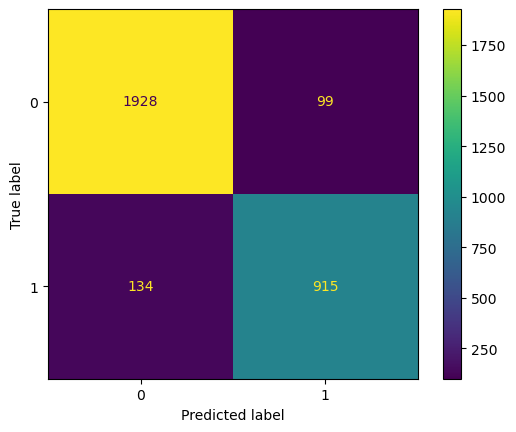

In [73]:
# plot confusion Matrix using matrixDisplay
ConfusionMatrixDisplay.from_estimator( LRStack, X_test, y_test)
plt.show()

In [74]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [75]:
Mlp_metrics = evaluate_preds(y_test, YpredMLP)


Acc: 78.71%
Precision: 0.71
Recall: 0.64
F1 score: 0.67


In [76]:
XGB_metrics = evaluate_preds(y_test, YpredXGB)



Acc: 86.44%
Precision: 0.82
Recall: 0.77
F1 score: 0.79


In [77]:
GRB_metrics = evaluate_preds(y_test, YpredGBC)


Acc: 91.38%
Precision: 0.89
Recall: 0.85
F1 score: 0.87


In [78]:
RF1_metrics = evaluate_preds(y_test, YpredRF)

Acc: 87.97%
Precision: 0.85
Recall: 0.79
F1 score: 0.82


In [79]:
CatBoost_mterics =evaluate_preds(y_test, Ypredcat)

Acc: 88.88%
Precision: 0.87
Recall: 0.80
F1 score: 0.83


In [80]:
LGBoost_mterics =evaluate_preds(y_test, YpredLBC)

Acc: 91.87%
Precision: 0.90
Recall: 0.86
F1 score: 0.88


In [81]:
StackGBC_finalestimator_metrics = evaluate_preds(y_test, y_test_predLR)

Acc: 92.43%
Precision: 0.90
Recall: 0.87
F1 score: 0.89


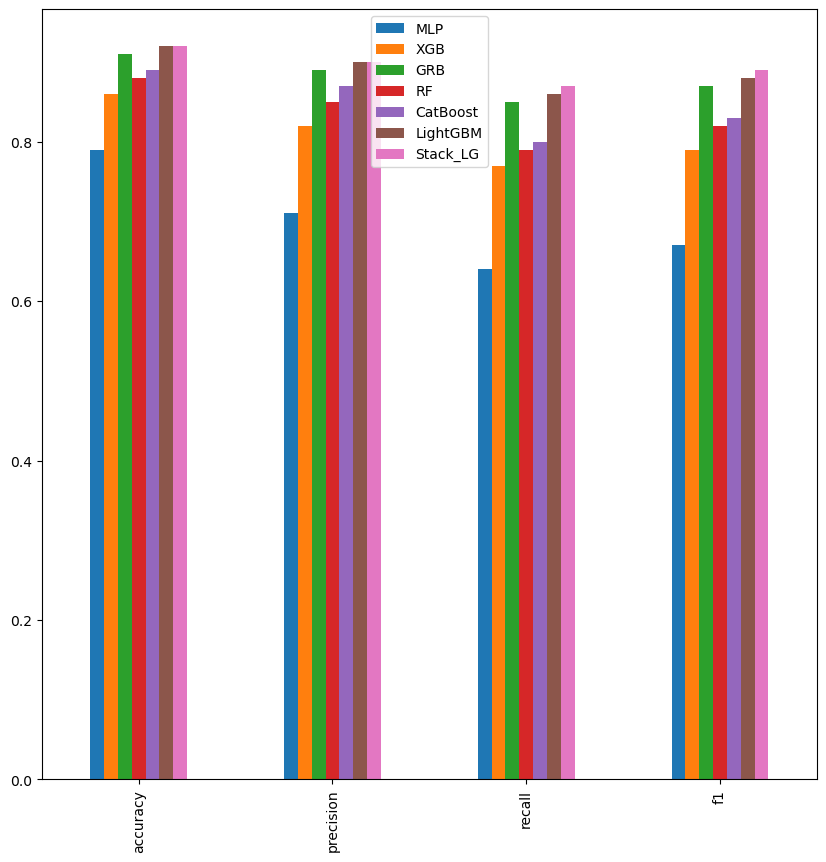

In [82]:
compare_metrics = pd.DataFrame({"MLP": Mlp_metrics,
                                "XGB": XGB_metrics,
                                "GRB": GRB_metrics,
                                "RF": RF1_metrics,
                                "CatBoost": CatBoost_mterics,
                                "LightGBM": LGBoost_mterics,
                                "Stack_LG": StackGBC_finalestimator_metrics
                               })

compare_metrics.plot.bar(figsize=(10, 10));

In [83]:
compare_metrics

MLP   XGB   GRB    RF  CatBoost  LightGBM  Stack_LG
accuracy   0.79  0.86  0.91  0.88      0.89      0.92      0.92
precision  0.71  0.82  0.89  0.85      0.87      0.90      0.90
recall     0.64  0.77  0.85  0.79      0.80      0.86      0.87
f1         0.67  0.79  0.87  0.82      0.83      0.88      0.89

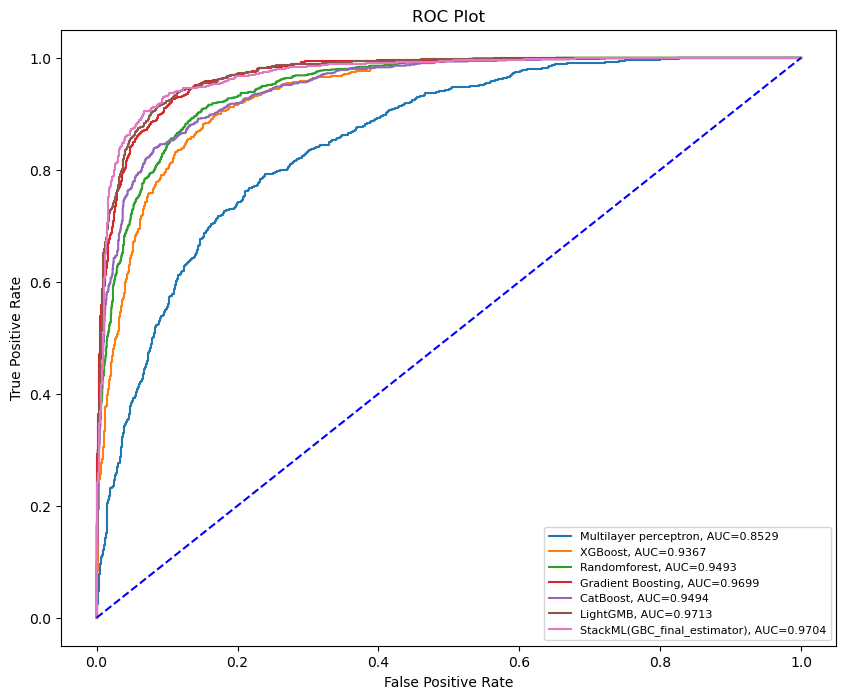

In [84]:
## https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
#set up plotting area
plt.figure(0,figsize=(10, 8)).clf()
# plot ROC curve for MLP
y_pred = gridMLP.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Multilayer perceptron, AUC="+str(auc))
# plot ROC curve for XGB
y_pred = XGB_hy.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))
#fit gradient boosted model and plot ROC curve
y_pred = grid_RF.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Randomforest, AUC="+str(auc))
y_pred = Grid_GBC.predict_proba(X_test)[:, 1]       ## keep probabilities for the positive outcome only
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))
# plot ROC curve for CatBoost
y_pred = Gridcat.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="CatBoost, AUC="+str(auc))
# plot ROC curve for LighGMB
y_pred = LBC_cv.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LightGMB, AUC="+str(auc))
#fit stackML model (LR as final estimator) and plot ROC curve
y_pred = LRStack.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="StackML(GBC_final_estimator), AUC="+str(auc))
#fit stackML model (LR as final estimator) and plot ROC curve
plt.plot([0,1],[0,1], color='blue',linestyle='--')
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#add legend
plt.legend(fontsize=8)

In [85]:
X1 = dataset1.iloc[:, :-1]

In [86]:
X1.columns

Index(['Easting', 'Northing', 'Elevation', 'AEM_resistivity'], dtype='object')

<AxesSubplot:xlabel='importance', ylabel='feature'>

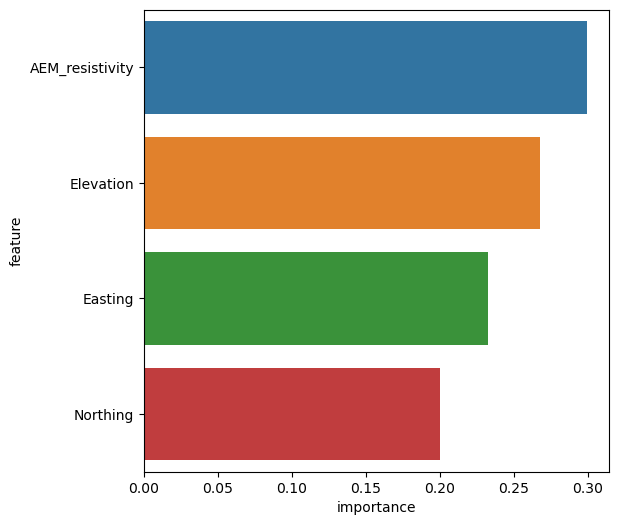

In [87]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X1.columns
feature_importance_df["importance"] = XGB_hy.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (6, 6))
sns.barplot(x ='importance', y ='feature', data= feature_importance_df)

In [88]:
#!pip install shap
import shap



In [89]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(XGB_hy, model_output='raw')
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Explainer expected value: -0.6107478737831116


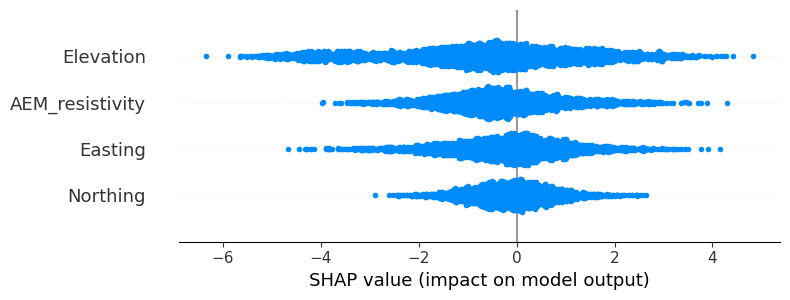

In [90]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X1.columns)

In [91]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(XGB_hy)
shap_values = explainer.shap_values(X_importance)

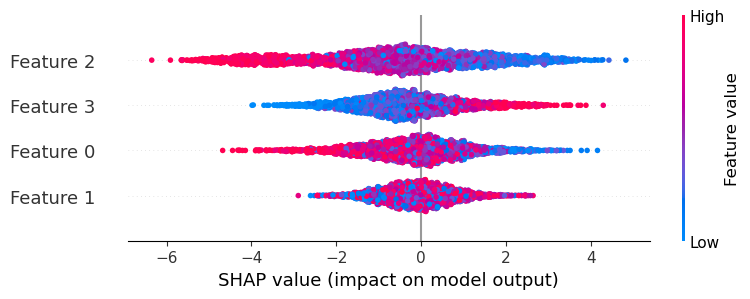

In [92]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

##### final_ predict for full AEM survey area using trained model

In [93]:
### import the results into the Geoscene 3D model, show crosections and compare to boreholes Lithological logs 

In [94]:
SCI_smoothAEM

X              Y      Z      Value
0        719200  190100.000000  104.7   7.648760
1        718800  190301.190476  104.7   7.648738
2        719000  190301.190476  104.7   7.691962
3        719200  190301.190476  104.7   7.691097
4        719400  190301.190476  104.7   7.688984
...         ...            ...    ...        ...
1626622  734600  206798.809524  529.6  13.990762
1626623  734800  206798.809524  529.6  14.021527
1626624  718400  207000.000000  529.6  13.587871
1626625  718600  207000.000000  529.6  13.811762
1626626  718800  207000.000000  529.6  13.598382

[1626627 rows x 4 columns]

In [95]:
X_test_SCIsmooth= SCI_smoothAEM.iloc[:, :].values


In [96]:
X_test_SCIsmooth

array([[7.19200000e+05, 1.90100000e+05, 1.04700000e+02, 7.64875984e+00],
       [7.18800000e+05, 1.90301190e+05, 1.04700000e+02, 7.64873838e+00],
       [7.19000000e+05, 1.90301190e+05, 1.04700000e+02, 7.69196177e+00],
       ...,
       [7.18400000e+05, 2.07000000e+05, 5.29600000e+02, 1.35878706e+01],
       [7.18600000e+05, 2.07000000e+05, 5.29600000e+02, 1.38117619e+01],
       [7.18800000e+05, 2.07000000e+05, 5.29600000e+02, 1.35983820e+01]])

In [97]:
X_test_SCIsmooth = sc.transform(X_test_SCIsmooth)

In [98]:
X_test_SCIsmooth

array([[-0.07217693, -2.1374163 , -9.24657773, -1.49072239],
       [-0.11204069, -2.09068977, -9.24657773, -1.49072531],
       [-0.09210881, -2.09068977, -9.24657773, -1.48484086],
       ...,
       [-0.15190446,  1.78761287,  1.96332067, -0.68216826],
       [-0.13197257,  1.78761287,  1.96332067, -0.65168757],
       [-0.11204069,  1.78761287,  1.96332067, -0.68073723]])

In [99]:
Stack_predLR = LRStack.predict_proba(X_test_SCIsmooth) 

In [100]:
dataAEM=SCI_smoothAEM

In [101]:
df_tests = pd.DataFrame(dataAEM)
#df_test['Target'] = y_test
df_tests['prob_0'] = Stack_predLR[:,0] 
df_tests['prob_1'] = Stack_predLR[:,1]
#df_tests['prob_2'] = MLPpredictions[:,2]
#df_tests['prob_3'] = MLPpredictions[:,3]

In [102]:
df_tests.head(30)

X              Y      Z     Value    prob_0    prob_1
0   719200  190100.000000  104.7  7.648760  0.920946  0.079054
1   718800  190301.190476  104.7  7.648738  0.994346  0.005654
2   719000  190301.190476  104.7  7.691962  0.542662  0.457338
3   719200  190301.190476  104.7  7.691097  0.915373  0.084627
4   719400  190301.190476  104.7  7.688984  0.999223  0.000777
5   719600  190301.190476  104.7  7.648751  0.996990  0.003010
6   718800  190502.380952  104.7  7.648737  0.994346  0.005654
7   719000  190502.380952  104.7  7.696467  0.547764  0.452236
8   719200  190502.380952  104.7  7.835673  0.994302  0.005698
9   719400  190502.380952  104.7  7.932114  0.988784  0.011216
10  719600  190502.380952  104.7  7.648786  0.996990  0.003010
11  718800  190703.571429  104.7  7.648643  0.994346  0.005654
12  719000  190703.571429  104.7  7.686968  0.547764  0.452236
13  719200  190703.571429  104.7  8.593281  0.065913  0.934087
14  719400  190703.571429  104.7  8.080039  0.973259  0.026741
15  719600  190703.571429  104.7  7.648697  0.988918  0.011082
16  722800  190703.571429  104.7  7.326040  0.000020  0.999980
17  723000  190703.571429  104.7  7.345884  0.000108  0.999892
18  723200  190703.571429  104.7  7.621262  0.101589  0.898411
19  718800  190904.761905  104.7  7.648657  0.993042  0.006958
20  719000  190904.761905  104.7  7.648324  0.676694  0.323306
21  719200  190904.761905  104.7  7.647773  0.846514  0.153486
22  719400  190904.761905  104.7  7.648391  0.998351  0.001649
23  719600  190904.761905  104.7  7.648674  0.987330  0.012670
24  721600  190904.761905  104.7  7.606072  0.021771  0.978229
25  721800  190904.761905  104.7  7.843118  0.000087  0.999913
26  722000  190904.761905  104.7  8.422686  0.960323  0.039677
27  722200  190904.761905  104.7  8.234087  0.000168  0.999832
28  722400  190904.761905  104.7  7.746788  0.953691  0.046309
29  722600  190904.761905  104.7  8.216453  0.000233  0.999767

In [103]:
df_tests.to_csv('StackML_GBC_probabilisti.txt', sep=';', index=True)

<IPython.core.display.Javascript object>


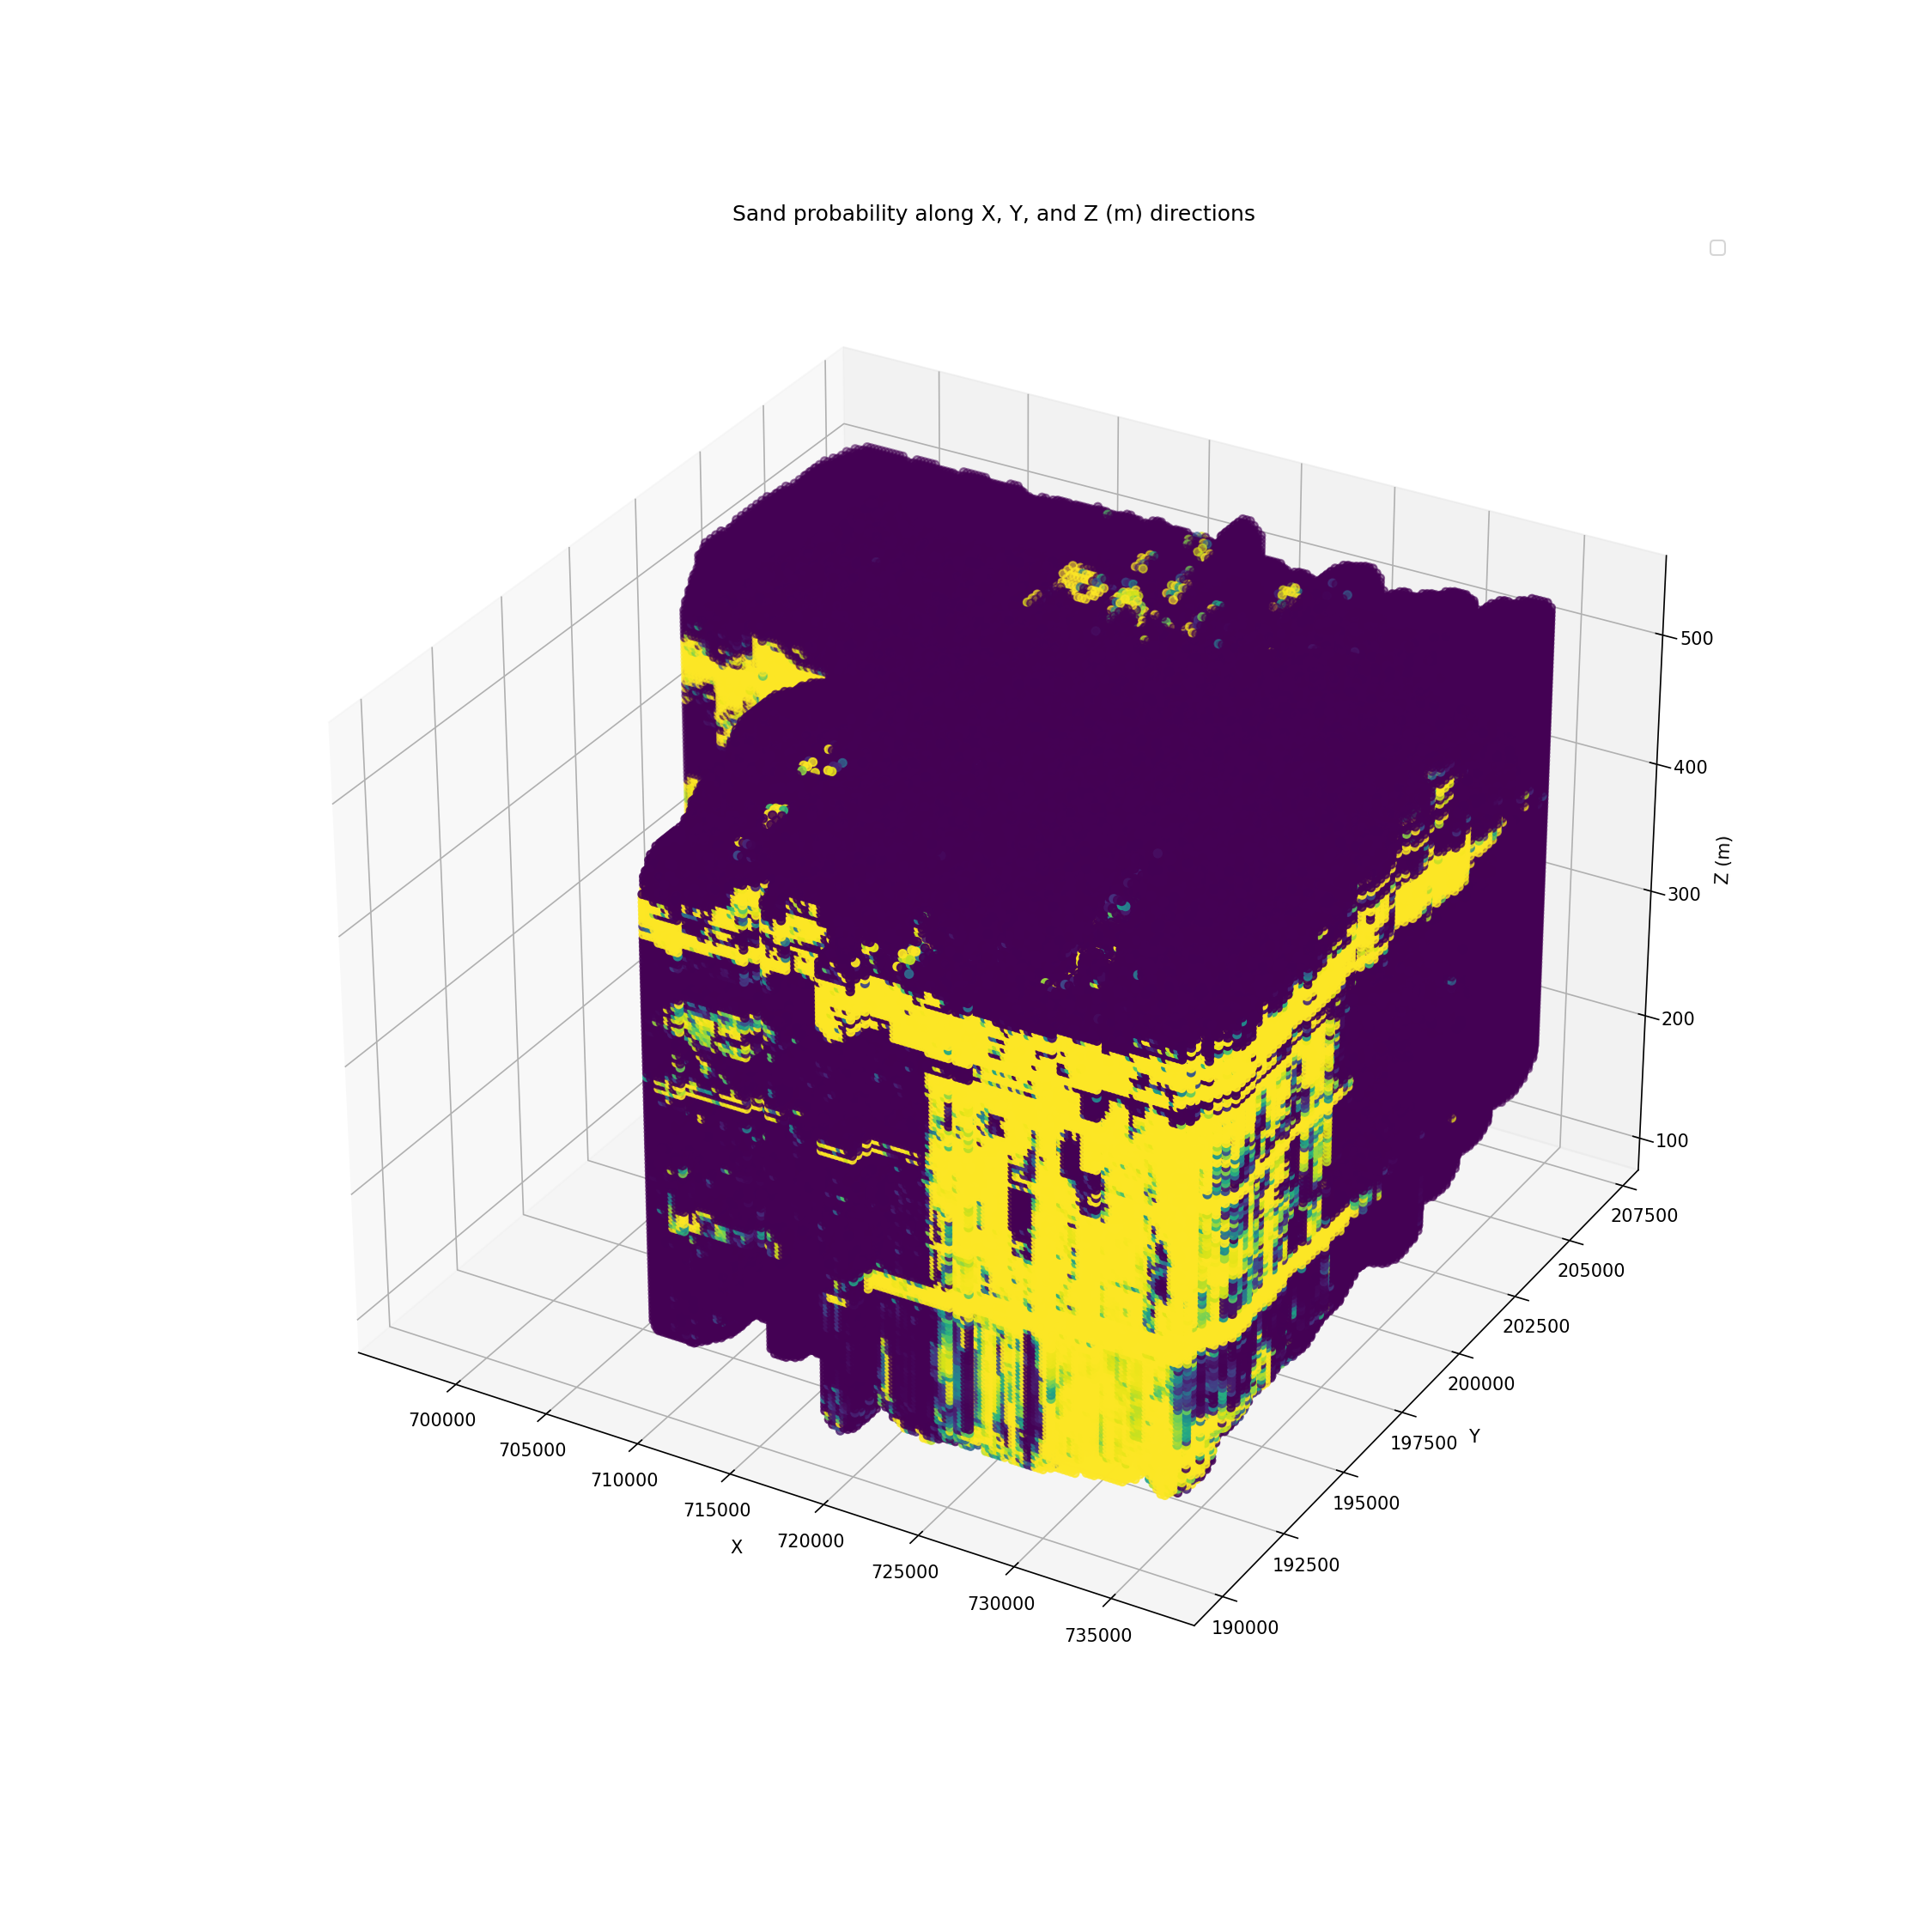

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [133]:
%matplotlib notebook
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection="3d")
ax.scatter3D(df_tests['X'], df_tests['Y'], df_tests['Z'], 
             c = df_tests['prob_1'])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z (m)")
ax.set_title(" Sand probability along X, Y, and Z (m) directions")
ax.legend(*scatter.legend_elements(), title="Sand Probability",fontsize="x-large");
#ax.view_init(70, 35)
#ax.legend(ax.legend(df_tests['prob_1','prob_0']))
plt.show()
plt.legend()

In [185]:
%matplotlib notebook
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection="3d")
sctt=ax.scatter3D(df_tests['X'], df_tests['Y'], df_tests['Z'], 
             c = df_tests['prob_1'])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z (m)")
ax.set_title(" Sand probability along X, Y, and Z (m) directions")
ax.legend(title="Sand Probability",fontsize="x-large");
ax.view_init(35, 60)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

#ax.legend(ax.legend(df_tests['prob_1','prob_0']))
plt.show()
plt.legend()

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [154]:
import matplotlib as mpl

In [169]:
x=df_tests.X
y=df_tests.Y
z= df_tests.Z
c=df_tests.prob_1

<IPython.core.display.Javascript object>


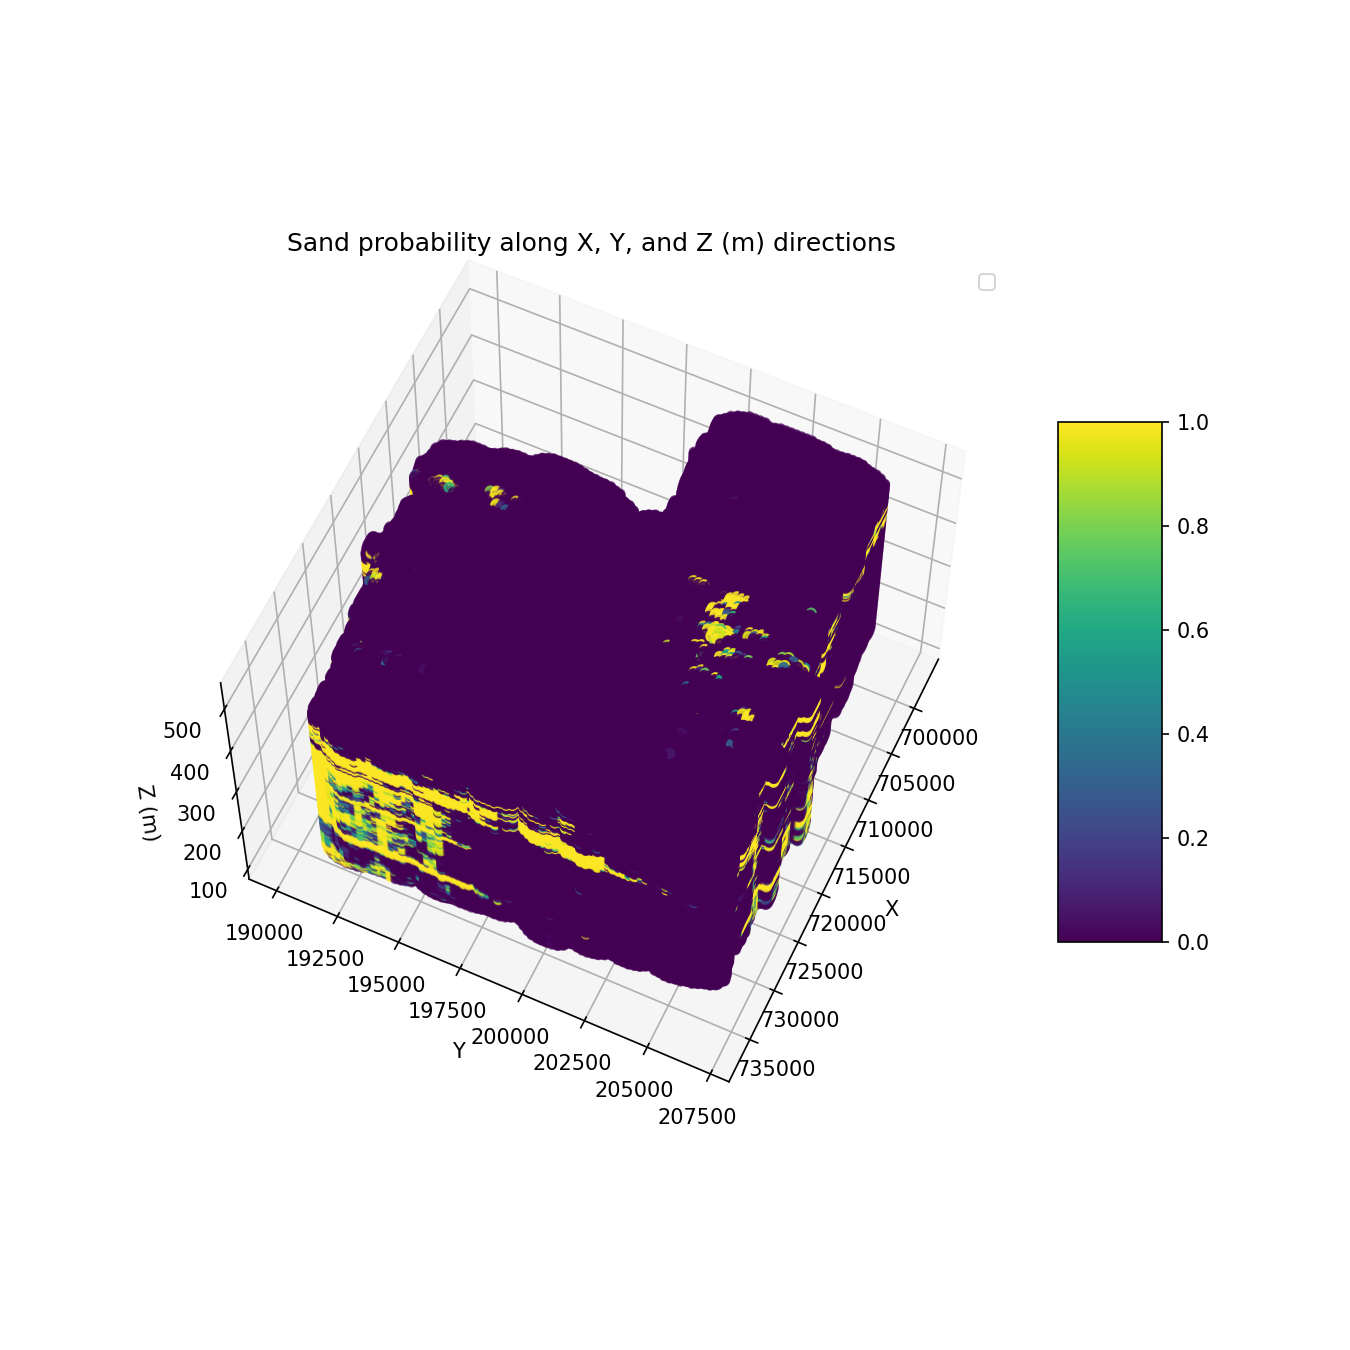

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [187]:
%matplotlib notebook
fig = plt.figure(figsize=(9, 9))
ax = plt.axes(projection="3d")
sctt=ax.scatter3D(df_tests['X'], df_tests['Y'], df_tests['Z'], 
             c = df_tests['prob_1'])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z (m)")
ax.set_title(" Sand probability along X, Y, and Z (m) directions")
#ax.legend(title="Sand Probability",fontsize="x-large")
ax.view_init(60, 25)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()
plt.legend()

# 3D visulization using GEOScene3D(https://geoscene3d.com/)
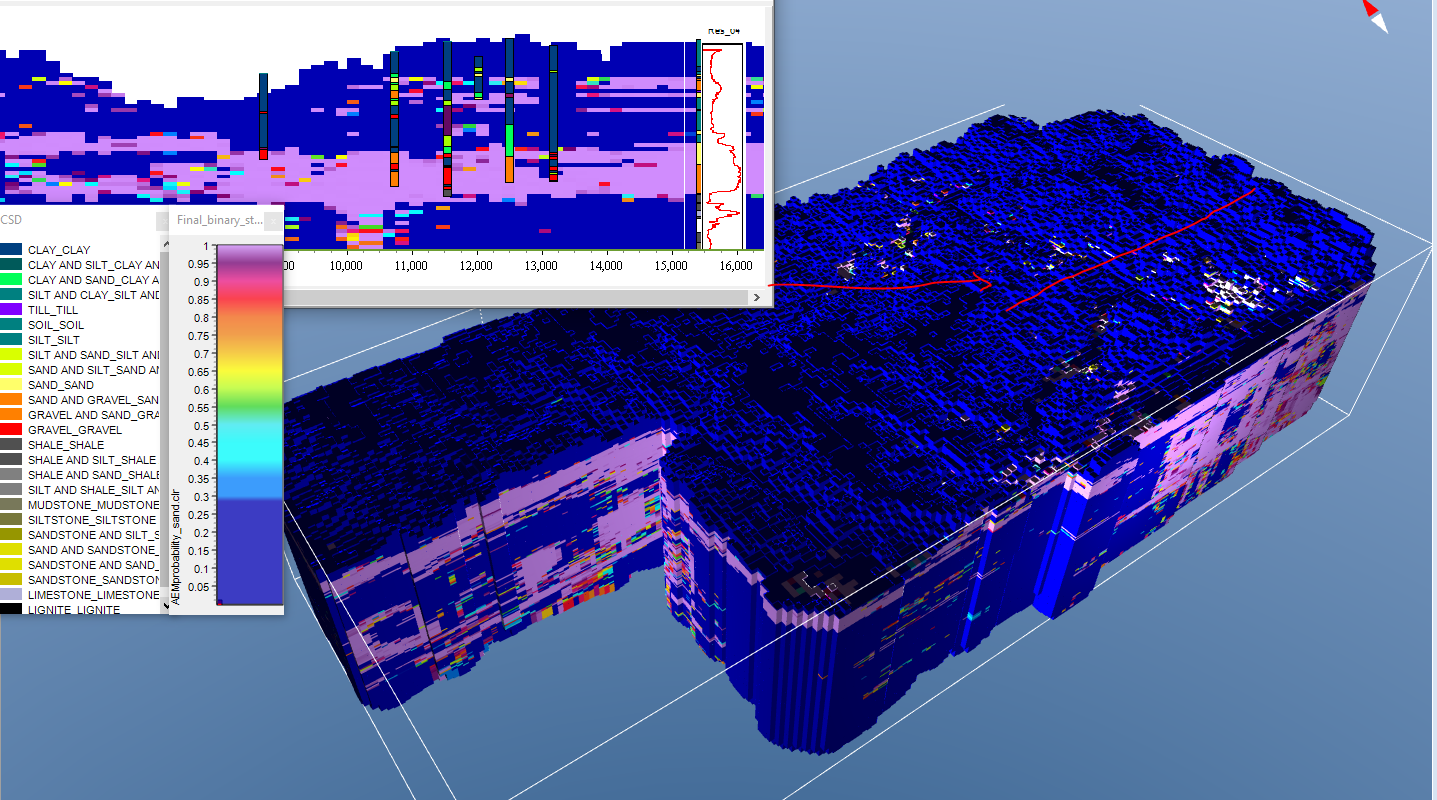